In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import nltk
from nltk.corpus import wordnet
from collections import Counter


#nltk.download('wordnet')
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('stopwords')

from nltk import word_tokenize, pos_tag
from nltk.corpus import stopwords
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import nltk

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


from sklearn.svm import SVC
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import pandas as pd
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap


#%matplotlib qt
%matplotlib inline

# Prétraitement
-
-
-
-

In [32]:
df = pd.read_csv("scitweets_export.tsv", sep = "\t")

In [33]:
# Téléchargement des ressources NLTK
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('wordnet')

# Chargement des données
file_path = 'scitweets_export.tsv'
df = pd.read_csv(file_path, sep='\t')

# Prétraitement du texte (identique à votre version)
stop_words = set(stopwords.words('english'))
custom_stop_words = {"http", "https", "rt", "co", "amp", "via"}
#negations = {"not", "no", "nor", "neither", "never", "none"}
stop_words.update(custom_stop_words)
lemmatizer = WordNetLemmatizer()

def preprocess_tweet(tweet):
    tweet = re.sub(r"@\w+|\W", " ", tweet)
    tweet = tweet.lower()
    tokens = word_tokenize(tweet)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

df['cleaned_text'] = df['text'].apply(preprocess_tweet)

In [34]:
cleaned_text = []
for sentence in df["cleaned_text"]:
    cleaned_text.append(sentence.split(" "))

In [35]:
full_text = []
for sentence in df["text"]:
    full_text.append(sentence.split(" "))

In [36]:
def plot_word_distribution(word_list, nombre_de_mots):
    word_list_flat = [word for sublist in word_list for word in sublist]
    word_counts = Counter(word_list_flat)
    # 3. Afficher les 10 mots les plus fréquents (optionnel)
    most_common = word_counts.most_common(nombre_de_mots)
    #print(most_common[0:10])
    words, counts = zip(*most_common)
    
    # 4. Tracer avec seaborn
    #plt.figure(figsize=(30, 12))
    plt.figure(figsize=(16, 8)).gca()
    sns.barplot(x=list(words), y=list(counts))
    plt.title("Distribution des " + str(nombre_de_mots) + " mots les plus fréquents", fontsize = 25)
    plt.ylabel("Nombre d'occurrences", fontsize = 20)
    plt.xlabel("Mots", fontsize = 20)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


## Distribution des mots avant prétraitement

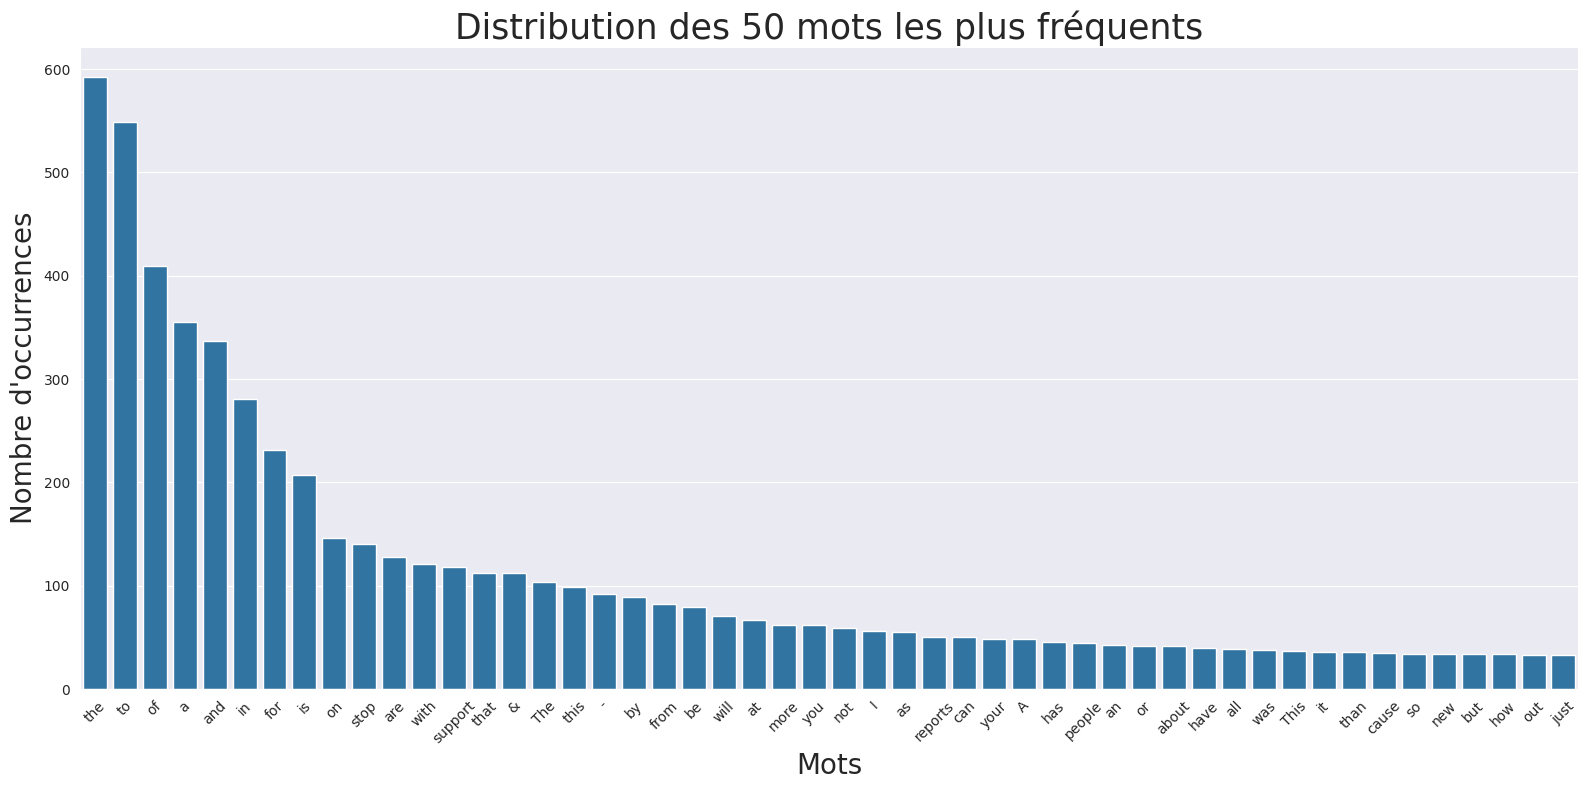

In [37]:
plot_word_distribution(full_text, nombre_de_mots=50)

## Distribution des mots après prétraitement

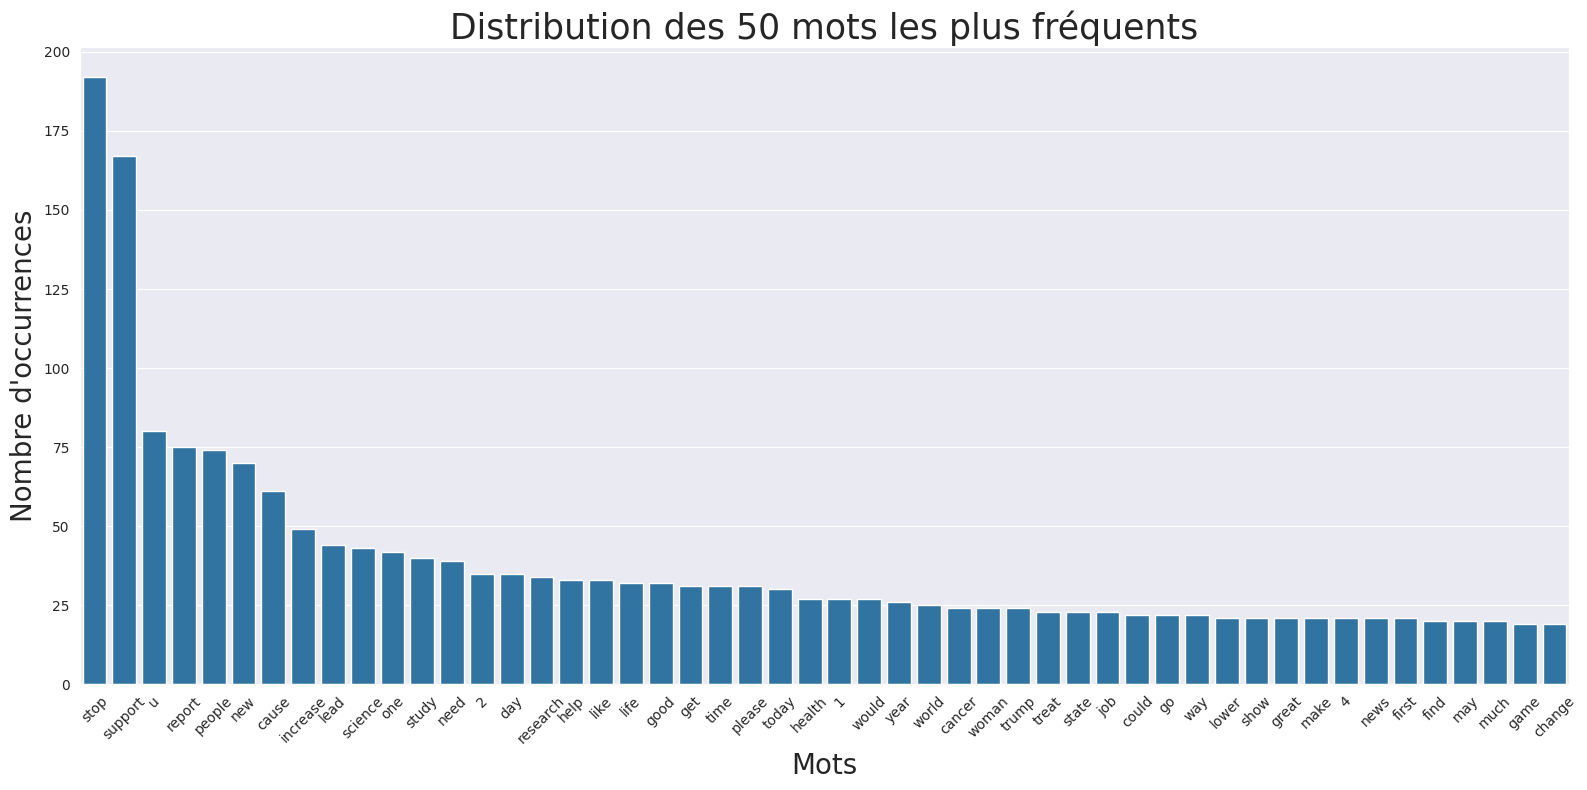

In [38]:
plot_word_distribution(cleaned_text, nombre_de_mots=50)

In [39]:
def remake_sentences(sentence_list):
    sentence_join = []
    phrase = ""
    for sentence in sentence_list:
        for word in sentence:
            phrase = phrase + word + " "
        sentence_join.append(phrase)
        phrase = ""
    return(sentence_join)


In [40]:
#X = remake_sentences(filtered_words)  # Utiliser uniquement la colonne 'text' comme feature
X = df["text"]
y_binary = df['science_related']  # Étiquette binaire (scientifique ou non)


X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=1)

vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=100000)
X_vec = vectorizer.fit_transform(X)  # Apprentissage et transformation sur l'entraînement

X_train_vec = vectorizer.fit_transform(X_train)  # Apprentissage et transformation sur l'entraînement


X_test_vec = vectorizer.transform(X_test)

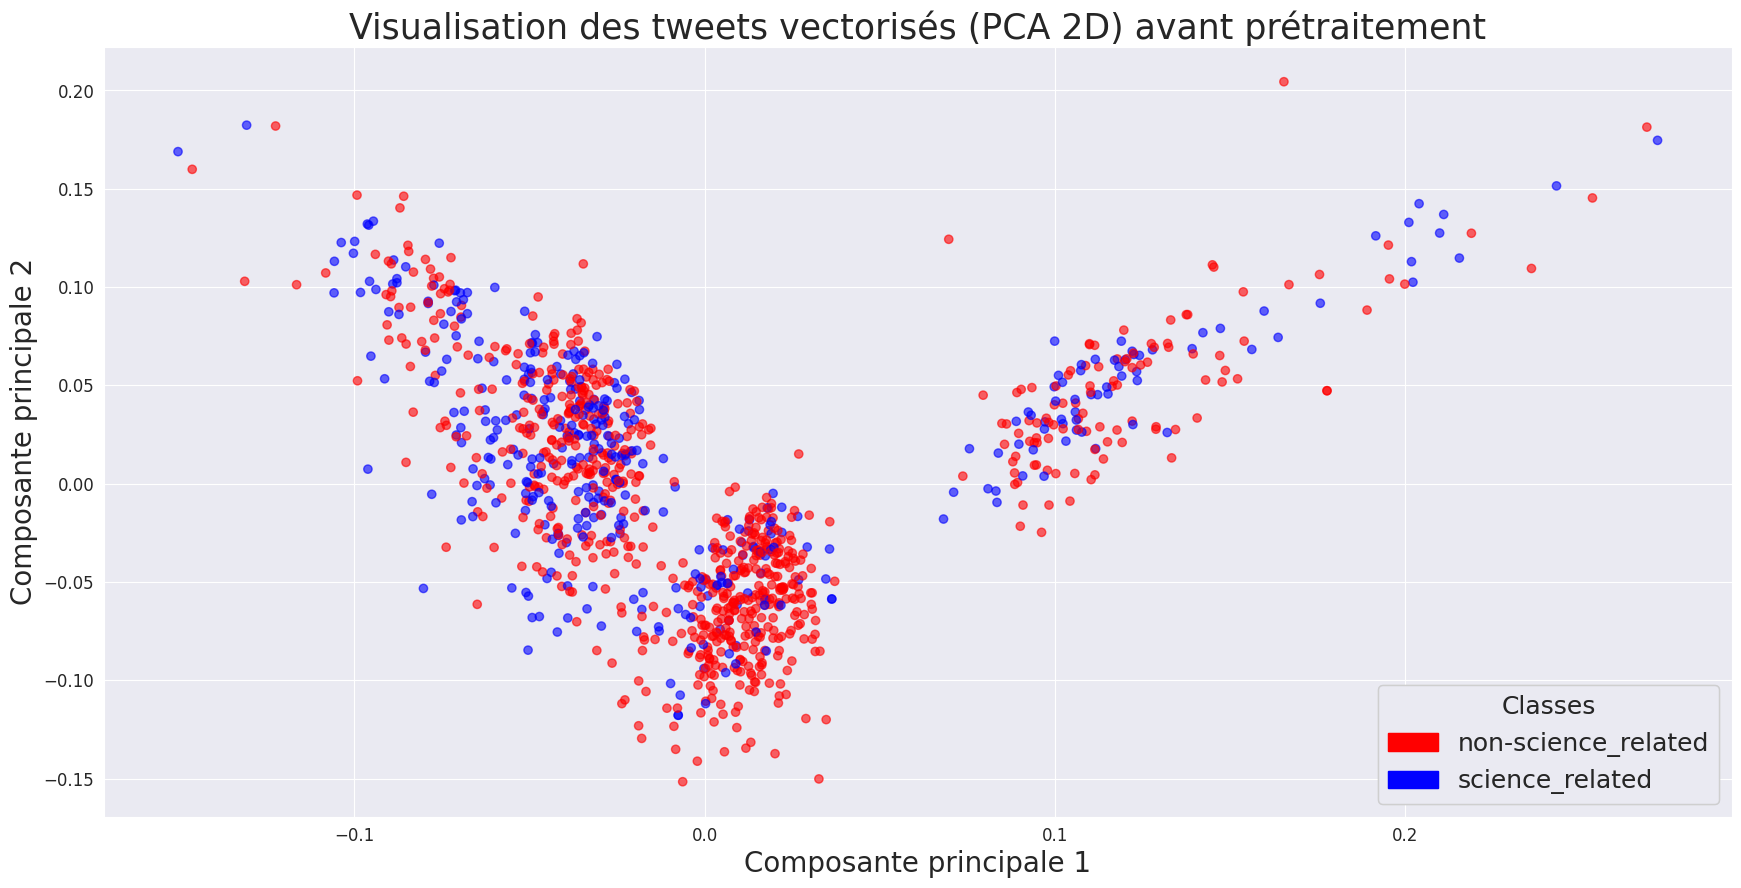

In [41]:
import matplotlib.patches as mpatches

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_vec.toarray())

# Préparation de la figure
plt.figure(figsize=(21, 10))

# SCATTERPLOT avec couleur en fonction des classes (y_binary)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_binary, cmap=ListedColormap(['red', 'blue']), alpha=0.6)

# LÉGENDE 1 : pour y_binary
# Créer des étiquettes de couleur
class_labels = {0: 'non-science_related', 1: 'science_related'}
unique_classes = np.unique(y_binary)

handles = [
    mpatches.Patch(color=scatter.cmap(scatter.norm(cls)), label=class_labels[cls])
    for cls in unique_classes
]

legend1 = plt.legend(handles=handles, title='Classes', loc='lower right', prop={'size': 18}, title_fontsize=18)
plt.gca().add_artist(legend1)

# Ajouter les lignes rouges (zones de découpe)
#v1 = plt.axvline(x=-0.06, color='black', linestyle='--', linewidth=2)
#v2 = plt.axvline(x=0, color='black', linestyle='--', linewidth=2)
#h1 = plt.axhline(y=0.07, color='black', linestyle='--')
#h2 = plt.axhline(y=-0.05, color='black', linestyle='--')



# TITRES ET LABELS
plt.title('Visualisation des tweets vectorisés (PCA 2D) avant prétraitement', fontsize = 25)
plt.xlabel('Composante principale 1', fontsize = 20)
plt.ylabel('Composante principale 2', fontsize = 20)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


In [42]:
%reset -f
%clear

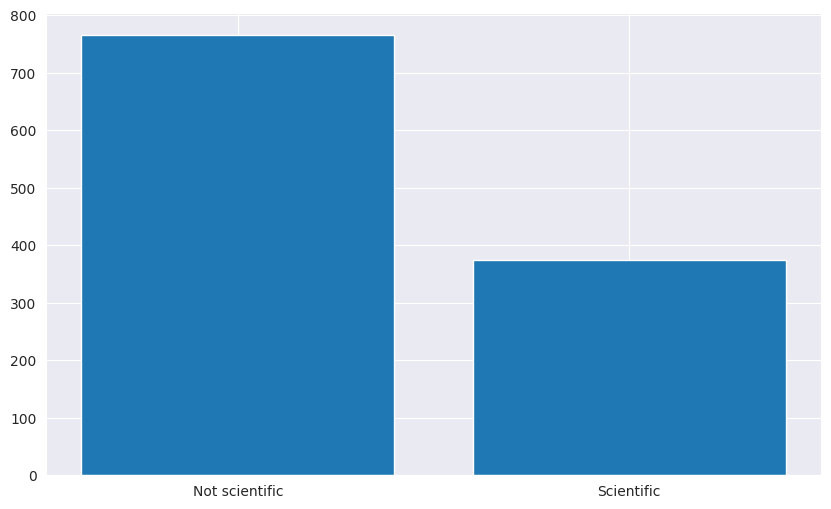

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import nltk


dataset = pd.read_csv('scitweets_export.tsv', sep='\t')


not_scientific = dataset.where(dataset['science_related'] == 0)
scientific = dataset.where(dataset['science_related'] == 1)

fig, ax = plt.subplots()
ax.bar(['Not scientific', 'Scientific'], [not_scientific['tweet_id'].count(), scientific['tweet_id'].count()])
plt.show()

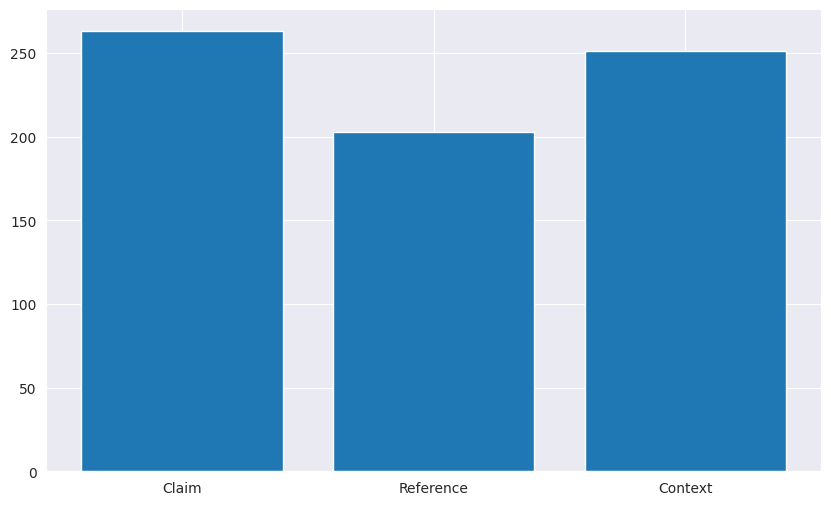

In [44]:
fig, ax = plt.subplots()
ax.bar(['Claim', "Reference", "Context"],
       [scientific.where(scientific['scientific_claim'] == 1)['tweet_id'].count(),
        scientific.where(scientific['scientific_reference'] == 1)['tweet_id'].count(),
        scientific.where(scientific['scientific_context'] == 1)['tweet_id'].count()])
plt.show()

# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


# Modélisation

## - Première classification

### Les modèles construit avec le texte d'origine

In [45]:
%reset -f
%clear


OPTIMISATION ET ÉVALUATION DE LOGISTIC REGRESSION

Recherche des meilleurs hyperparamètres pour Logistic Regression...
Fitting 5 folds for each of 6 candidates, totalling 30 fits

Meilleurs paramètres: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}

Classification Report sur le test set:
              precision    recall  f1-score   support

           0       0.77      0.92      0.84       146
           1       0.79      0.51      0.62        82

    accuracy                           0.78       228
   macro avg       0.78      0.72      0.73       228
weighted avg       0.78      0.78      0.76       228

Test Accuracy: 0.7763


/media/raphael/RawStorage/M1/HAI817I - Machine learning/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


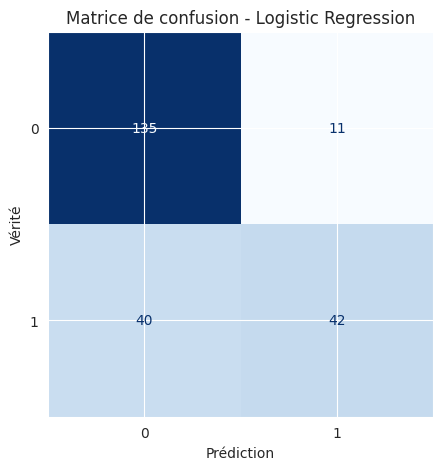


Top 50 mots les plus importants pour le modèle: Logistic Regression
stop: -35.9502
research: 24.8209
support: -23.3374
study: 23.0998
reports: -20.1092
funding: 17.5057
men: 16.5343
higher than: -14.1779
health: 14.1483
can: 13.9561
it you: 13.3322
brain: 13.2030
fear: 13.2008
eurekamag: 13.0597
scientists: 13.0092
over: -12.9738
proven to: 12.8149
co: 11.7067
treat: -11.4080
cancer: 11.1376
sciences: 11.0892
european: 10.7866
supports: -10.6984
born: 10.5306
sexual: 10.5048
lives: 10.3997
suicide: 10.3809
risk: 10.3795
turtles: 10.2047
promote: -10.1610
evidence: 9.9420
climate: 9.8523
bones: 9.7861
species: 9.7712
know that: 9.7069
they: -9.5560
rise: 9.4721
disorder: 9.2988
non: 9.2119
blood: 9.1567
drinking: 8.9767
china: 8.9454
pain: 8.8461
virus: 8.8451
based on: -8.7631
helps: 8.7537
march: 8.6518
comes: 8.6343
control: 8.6332
medicine: 8.6152


/media/raphael/RawStorage/M1/HAI817I - Machine learning/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



Cross-Validation Results (k=10):
Accuracy scores: [0.78070175 0.74561404 0.77192982 0.76315789 0.80701754 0.78947368
 0.88596491 0.70175439 0.78070175 0.8245614 ]
Mean accuracy: 0.7851 (±0.0463)

OPTIMISATION ET ÉVALUATION DE NAIVE BAYES

Recherche des meilleurs hyperparamètres pour Naive Bayes...
Fitting 5 folds for each of 6 candidates, totalling 30 fits

Meilleurs paramètres: {'alpha': 1.0, 'fit_prior': False}

Classification Report sur le test set:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       146
           1       0.79      0.59      0.67        82

    accuracy                           0.79       228
   macro avg       0.79      0.75      0.76       228
weighted avg       0.79      0.79      0.79       228

Test Accuracy: 0.7939


/media/raphael/RawStorage/M1/HAI817I - Machine learning/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


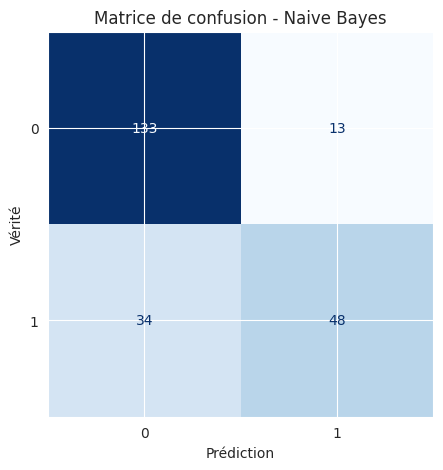


Top 50 mots les plus importants pour le modèle: Naive Bayes
stop: -2.2329
support: -1.6289
to stop: -1.5314
reports: -1.4027
study: 1.3578
just: -1.2091
need: -1.1584
trump: -1.1050
game: -1.0926
health: 1.0913
get: -1.0878
please: -1.0267
support for: -1.0055
stop being: -0.9937
team: -0.9914
news: -0.9865
all: -0.9736
eurekamag: 0.9657
to: -0.9595
thing: -0.9551
promote: -0.9532
so: -0.9500
stop the: -0.9276
engineer: -0.9250
this: -0.9181
risk: 0.9017
treat: -0.8949
he: -0.8942
over: -0.8907
week: -0.8861
no: -0.8808
brain: 0.8779
supports: -0.8662
to support: -0.8548
to be: -0.8528
there: -0.8517
changes: 0.8495
must: -0.8366
infection: 0.8365
off: -0.8352
they: -0.8349
would: -0.8273
being: -0.8230
reports https: -0.8188
stops: -0.8152
if: -0.8117
to promote: -0.8097
god: -0.8089
need to: -0.8040
don: -0.8004

Cross-Validation Results (k=10):
Accuracy scores: [0.8245614  0.75438596 0.78947368 0.78947368 0.84210526 0.74561404
 0.83333333 0.72807018 0.78947368 0.78947368]
Mean accu

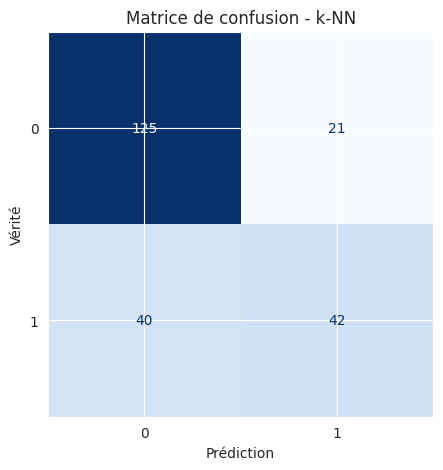


Top 50 mots les plus importants pour le modèle: k-NN
⚠️ Ce modèle ne fournit pas directement une importance des features (ex: k-NN).

Cross-Validation Results (k=10):
Accuracy scores: [0.77192982 0.68421053 0.76315789 0.77192982 0.76315789 0.77192982
 0.85087719 0.72807018 0.75438596 0.74561404]
Mean accuracy: 0.7605 (±0.0396)

OPTIMISATION ET ÉVALUATION DE RANDOM FOREST

Recherche des meilleurs hyperparamètres pour Random Forest...
Fitting 5 folds for each of 12 candidates, totalling 60 fits

Meilleurs paramètres: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}

Classification Report sur le test set:
              precision    recall  f1-score   support

           0       0.65      1.00      0.79       146
           1       1.00      0.06      0.11        82

    accuracy                           0.66       228
   macro avg       0.83      0.53      0.45       228
weighted avg       0.78      0.66      0.55       228

Test Accuracy: 0.6623


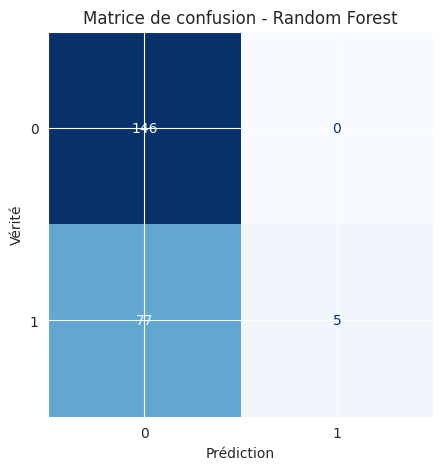


Top 50 mots les plus importants pour le modèle: Random Forest
stop: 0.0116
co: 0.0112
https co: 0.0105
study: 0.0098
https: 0.0084
research: 0.0080
health: 0.0079
of: 0.0075
support: 0.0075
can: 0.0066
in: 0.0053
to: 0.0047
eurekamag: 0.0046
cancer: 0.0046
is: 0.0045
brain: 0.0041
of the: 0.0036
http co: 0.0032
http: 0.0032
men: 0.0029
climate: 0.0028
science: 0.0027
lives: 0.0027
as: 0.0027
risk: 0.0026
and: 0.0026
scientists: 0.0025
sciences: 0.0025
women: 0.0025
reports: 0.0025
the: 0.0024
on: 0.0024
pain: 0.0022
infection: 0.0022
how: 0.0022
it: 0.0022
virus: 0.0021
treatment: 0.0020
up: 0.0020
pain changes: 0.0019
killer: 0.0019
in the: 0.0018
what: 0.0018
changes people: 0.0017
control: 0.0017
are: 0.0017
public: 0.0017
cases: 0.0016
with: 0.0016
species: 0.0016

Cross-Validation Results (k=10):
Accuracy scores: [0.71052632 0.66666667 0.74561404 0.76315789 0.68421053 0.76315789
 0.73684211 0.66666667 0.64912281 0.73684211]
Mean accuracy: 0.7123 (±0.0405)

OPTIMISATION ET ÉVALUAT

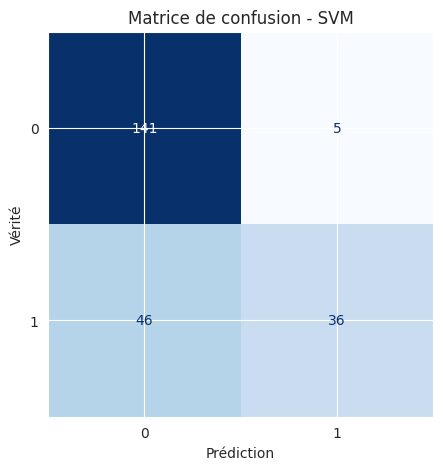


Top 50 mots les plus importants pour le modèle: SVM
Erreur lors de l'extraction des features importantes : unsupported format string passed to csr_matrix.__format__

Cross-Validation Results (k=10):
Accuracy scores: [0.80701754 0.78070175 0.8245614  0.8245614  0.78947368 0.78070175
 0.86842105 0.73684211 0.80701754 0.85964912]
Mean accuracy: 0.8079 (±0.0371)


In [46]:
import json
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import nltk
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = [10.0, 6.0]

# Téléchargement des ressources NLTK
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('wordnet')

# Chargement des données
file_path = 'scitweets_export.tsv'
df = pd.read_csv(file_path, sep='\t')

# Vectorisation et SMOTE (identique)
X = df['text']
y_binary = df['science_related']
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=20000)
X_vec = vectorizer.fit_transform(X)


# Split train-test (identique)
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42)

# Configuration KFold (identique)
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Dictionnaire des modèles AVEC leurs hyperparamètres à optimiser
models = {
    "Logistic Regression": {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'C': [0.1, 1, 10],
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear']
        }
    },
    "Naive Bayes": {
        'model': MultinomialNB(),
        'params': {
            'alpha': [0.1, 0.5, 1.0],
            'fit_prior': [True, False]
        }
    },
    "k-NN": {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'cosine']
        }
    },
    "Random Forest": {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5]
        }
    },
    "SVM": {
        'model': SVC(random_state=42),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']
        }
    }
}

to_plot = {}
confused = {}
# Évaluation optimisée de chaque modèle
for name, config in models.items():
    print(f"\n{'='*60}")
    print(f"OPTIMISATION ET ÉVALUATION DE {name.upper()}")
    print(f"{'='*60}")
    
    # Optimisation par GridSearchCV
    grid_search = GridSearchCV(
        estimator=config['model'],
        param_grid=config['params'],
        cv=5,  # Validation croisée interne pour l'optimisation
        scoring='accuracy',
        n_jobs=-1,
        verbose=1
    )
    
    print(f"\nRecherche des meilleurs hyperparamètres pour {name}...")
    grid_search.fit(X_train, y_train)
    
    # Meilleur modèle
    best_model = grid_search.best_estimator_
    print(f"\nMeilleurs paramètres: {grid_search.best_params_}")
    
    # Évaluation sur le test set
    y_pred = best_model.predict(X_test)
    print("\nClassification Report sur le test set:")
    print(classification_report(y_test, y_pred))
    print(f"Test Accuracy: {best_model.score(X_test, y_test):.4f}")
    
    #########################################################################################
    # Affichage de la matrice de confusion
    
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)

    confused[name] = {
        "sci": [[int(cm[0][0]), int(cm[0][1])],
                [int(cm[1][0]), int(cm[1][1])]]
                      }

    fig, ax = plt.subplots(figsize=(6, 5))
    disp.plot(ax=ax, cmap='Blues', colorbar=False)
    plt.title(f"Matrice de confusion - {name}")
    plt.xlabel("Prédiction")
    plt.ylabel("Vérité")
    plt.show()
    
    ##########################################################################################
    
    print(f"\nTop 50 mots les plus importants pour le modèle: {name}")

    feature_names = vectorizer.get_feature_names_out()
    try:
        if hasattr(best_model, 'coef_'):
            import numpy as np
            # Logistic Regression, SVM linéaire
            coef = best_model.coef_[0]
            top_indices = np.argsort(np.abs(coef))[-50:][::-1]
            for idx in top_indices:
                print(f"{feature_names[idx]}: {coef[idx]:.4f}")

        elif hasattr(best_model, 'feature_log_prob_'):
            # Naive Bayes
            import numpy as np
            importance = best_model.feature_log_prob_[1] - best_model.feature_log_prob_[0]
            top_indices = np.argsort(np.abs(importance))[-50:][::-1]
            for idx in top_indices:
                print(f"{feature_names[idx]}: {importance[idx]:.4f}")

        elif hasattr(best_model, 'feature_importances_'):
            # Random Forest
            import numpy as np
            importances = best_model.feature_importances_
            top_indices = np.argsort(importances)[-50:][::-1]
            for idx in top_indices:
                print(f"{feature_names[idx]}: {importances[idx]:.4f}")

        else:
            print("⚠️ Ce modèle ne fournit pas directement une importance des features (ex: k-NN).")

    except Exception as e:
        print(f"Erreur lors de l'extraction des features importantes : {e}")

    
    
    
    
    ##########################################################################################

    
    # Validation croisée k=10 avec le meilleur modèle (identique à votre configuration)
    cv_scores = cross_val_score(
        best_model,
        X_vec,
        y_binary,
        cv=kfold,
        scoring='accuracy'
    )
    
    print("\nCross-Validation Results (k=10):")
    print(f"Accuracy scores: {cv_scores}")
    print(f"Mean accuracy: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")
    to_plot[name] = [float(x) for x in cv_scores]

with open('model_comparison_1.json', 'w') as f:
    f.write(json.dumps({"keys": list(to_plot.keys()), "values": list(to_plot.values())}))

with open('confusion_1.json', 'w') as f:
    f.write(json.dumps({"keys": list(confused.keys()), "values": list(confused.values())}))


In [47]:
%reset -f
%clear


OPTIMISATION ET ÉVALUATION DE LOGISTIC REGRESSION

Recherche des meilleurs hyperparamètres pour Logistic Regression...
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/media/raphael/RawStorage/M1/HAI817I - Machine learning/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/media/raphael/RawStorage/M1/HAI817I - Machine learning/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



Meilleurs paramètres: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}

Classification Report sur le test set:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       147
           1       0.96      0.90      0.93       159

    accuracy                           0.93       306
   macro avg       0.93      0.93      0.93       306
weighted avg       0.93      0.93      0.93       306

Test Accuracy: 0.9281


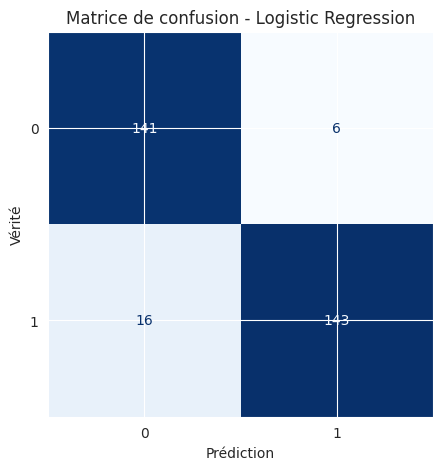


Top 50 mots les plus importants pour le modèle: Logistic Regression
stop: -9.4029
support: -6.8693
research: 5.0052
health: 4.9655
study: 4.5283
cancer: 4.4778
risk: 3.3241
report: -3.3028
climate: 3.0282
change: 2.9663
scientist: 2.9047
men: 2.8920
eurekamag: 2.8344
science: 2.8236
need: -2.7618
help: 2.6160
infection: 2.5747
brain: 2.5535
get: -2.5310
cell: 2.4012
change people: 2.3804
virus: 2.3708
n2qjtjq8tu: 2.2628
poverty: 2.2037
promote: -2.2015
actually: 2.2000
killer: 2.0921
treat: -2.0683
trump: -2.0636
please: -2.0255
new study: 1.9896
increase: 1.9699
important: 1.9527
life: 1.9521
week: -1.9430
sleep: 1.9302
covid: 1.9088
suicide: 1.8917
climatechange: 1.8831
drug: 1.8815
engineer: -1.8724
thing: -1.8368
might: 1.8155
reduces: 1.8004
european: 1.7687
could: 1.7584
read: 1.7582
therapy: 1.7550
climate change: 1.7132
news: -1.6811

Cross-Validation Results (k=10):
Accuracy scores: [0.92810458 0.93464052 0.94771242 0.91503268 0.88235294 0.94771242
 0.92810458 0.94117647 0.94

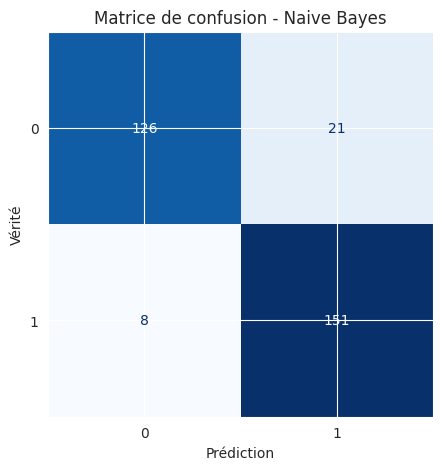


Top 50 mots les plus importants pour le modèle: Naive Bayes
change people: 3.7200
risk: 3.6758
sleep: 3.4782
cell: 3.4642
pain change: 3.4371
infection: 3.3951
new study: 3.3347
eurekamag: 3.2985
suicide: 3.2890
virus: 3.2549
reduces: 3.2037
climate change: 3.1624
therapy: 3.1050
actually: 3.1002
killer: 3.0966
flu: 3.0869
climatechange: 3.0329
week: -3.0180
promote: -3.0141
might: 2.9813
health: 2.9775
longer: 2.9322
european: 2.9303
poverty: 2.8974
disorder: 2.8860
business: -2.8731
n2qjtjq8tu: 2.8706
engineer: -2.8687
percent: 2.8676
low: 2.8483
leading: 2.8479
call: -2.8465
diabetes: 2.8256
bone: 2.8163
heart disease: 2.8025
inequality: 2.7955
decreased: 2.7852
government: -2.7822
mental health: 2.7810
ur: -2.7810
fat: 2.7790
key: 2.7472
dog: -2.7464
population: 2.7427
coronavirus: 2.7386
god: -2.7350
depression: 2.7156
vxh2gnrtrp: 2.7145
science amazing: 2.7145
power science: 2.7145

Cross-Validation Results (k=10):
Accuracy scores: [0.92156863 0.94117647 0.91503268 0.87581699 0.

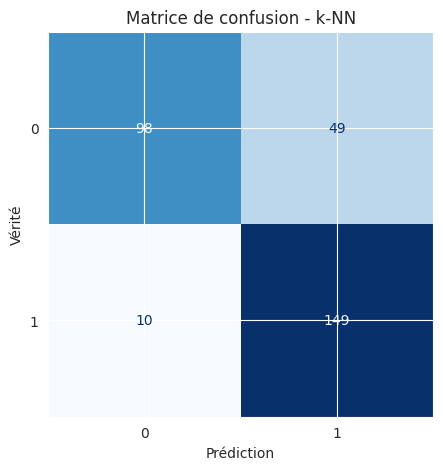


Top 50 mots les plus importants pour le modèle: k-NN
⚠️ Ce modèle ne fournit pas directement une importance des features (ex: k-NN).

Cross-Validation Results (k=10):
Accuracy scores: [0.81045752 0.85620915 0.79738562 0.75163399 0.79084967 0.83006536
 0.81045752 0.84313725 0.84313725 0.75816993]
Mean accuracy: 0.8092 (±0.0337)

OPTIMISATION ET ÉVALUATION DE RANDOM FOREST

Recherche des meilleurs hyperparamètres pour Random Forest...
Fitting 5 folds for each of 12 candidates, totalling 60 fits

Meilleurs paramètres: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}

Classification Report sur le test set:
              precision    recall  f1-score   support

           0       0.74      0.99      0.85       147
           1       0.98      0.68      0.80       159

    accuracy                           0.83       306
   macro avg       0.86      0.83      0.82       306
weighted avg       0.87      0.83      0.82       306

Test Accuracy: 0.8268


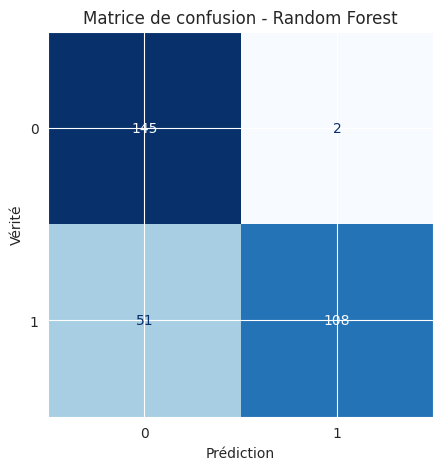


Top 50 mots les plus importants pour le modèle: Random Forest
stop: 0.0240
support: 0.0149
health: 0.0133
research: 0.0116
study: 0.0107
cancer: 0.0106
risk: 0.0090
science: 0.0058
report: 0.0057
change: 0.0053
scientist: 0.0047
virus: 0.0045
brain: 0.0043
eurekamag: 0.0043
climate: 0.0043
men: 0.0042
infection: 0.0039
need: 0.0038
cell: 0.0034
physical: 0.0031
change people: 0.0031
increase: 0.0031
poverty: 0.0031
important: 0.0028
help: 0.0028
non: 0.0027
new study: 0.0027
life: 0.0026
actually: 0.0026
depression: 0.0026
might: 0.0025
growth: 0.0025
climate change: 0.0024
drug: 0.0024
therapy: 0.0024
suicide: 0.0023
covid: 0.0023
climatechange: 0.0023
effect: 0.0023
diabetes: 0.0022
state: 0.0022
reduces: 0.0022
n2qjtjq8tu: 0.0021
could: 0.0021
read: 0.0021
find: 0.0021
get: 0.0020
pain change: 0.0020
new: 0.0020
lead: 0.0020

Cross-Validation Results (k=10):
Accuracy scores: [0.83006536 0.8627451  0.90849673 0.86928105 0.84313725 0.86928105
 0.83660131 0.88888889 0.86928105 0.89542

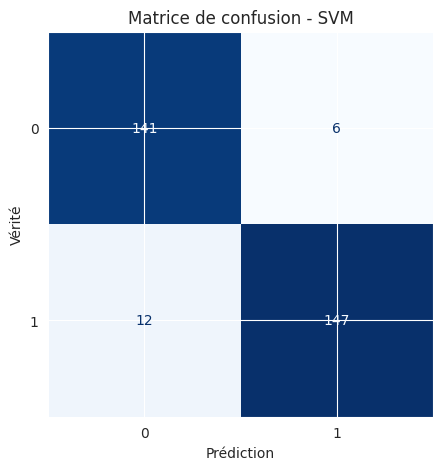


Top 50 mots les plus importants pour le modèle: SVM
Erreur lors de l'extraction des features importantes : unsupported format string passed to csr_matrix.__format__

Cross-Validation Results (k=10):
Accuracy scores: [0.92156863 0.95424837 0.95424837 0.92810458 0.90196078 0.94771242
 0.93464052 0.94771242 0.95424837 0.96732026]
Mean accuracy: 0.9412 (±0.0185)


In [49]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import nltk
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib as mpl
import json

mpl.rcParams['figure.figsize'] = [10.0, 6.0]

# Téléchargement des ressources NLTK
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('wordnet')

# Chargement des données
file_path = 'scitweets_export.tsv'
df = pd.read_csv(file_path, sep='\t')

# Prétraitement du texte (identique à votre version)
stop_words = set(stopwords.words('english'))
custom_stop_words = {"http", "https", "rt", "co", "amp", "via"}
#negations = {"not", "no", "nor", "neither", "never", "none"}
stop_words.update(custom_stop_words)
lemmatizer = WordNetLemmatizer()

def preprocess_tweet(tweet):
    tweet = re.sub(r"@\w+|\W", " ", tweet)
    tweet = tweet.lower()
    tokens = word_tokenize(tweet)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

df['cleaned_text'] = df['text'].apply(preprocess_tweet)

# Vectorisation et SMOTE (identique)
X = df['cleaned_text']
y_binary = df['science_related']
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=20000)
X_vec = vectorizer.fit_transform(X)
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_vec, y_binary)

# Split train-test (identique)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Configuration KFold (identique)
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Dictionnaire des modèles AVEC leurs hyperparamètres à optimiser
models = {
    "Logistic Regression": {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'C': [0.1, 1, 10],
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear']
        }
    },
    "Naive Bayes": {
        'model': MultinomialNB(),
        'params': {
            'alpha': [0.1, 0.5, 1.0],
            'fit_prior': [True, False]
        }
    },
    "k-NN": {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'cosine']
        }
    },
    "Random Forest": {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5]
        }
    },
    "SVM": {
        'model': SVC(random_state=42),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']
        }
    }
}

confused = {}
to_plot = {}
# Évaluation optimisée de chaque modèle
for name, config in models.items():
    print(f"\n{'='*60}")
    print(f"OPTIMISATION ET ÉVALUATION DE {name.upper()}")
    print(f"{'='*60}")
    
    # Optimisation par GridSearchCV
    grid_search = GridSearchCV(
        estimator=config['model'],
        param_grid=config['params'],
        cv=5,  # Validation croisée interne pour l'optimisation
        scoring='accuracy',
        n_jobs=-1,
        verbose=1
    )
    
    print(f"\nRecherche des meilleurs hyperparamètres pour {name}...")
    grid_search.fit(X_train, y_train)
    
    # Meilleur modèle
    best_model = grid_search.best_estimator_
    print(f"\nMeilleurs paramètres: {grid_search.best_params_}")
    
    # Évaluation sur le test set
    y_pred = best_model.predict(X_test)
    print("\nClassification Report sur le test set:")
    print(classification_report(y_test, y_pred))
    print(f"Test Accuracy: {best_model.score(X_test, y_test):.4f}")
    
    #########################################################################################
    # Affichage de la matrice de confusion
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)

    confused[name] = {
        "sci": [[int(cm[0][0]), int(cm[0][1])],
                [int(cm[1][0]), int(cm[1][1])]]
                      }

    fig, ax = plt.subplots(figsize=(6, 5))
    disp.plot(ax=ax, cmap='Blues', colorbar=False)
    plt.title(f"Matrice de confusion - {name}")
    plt.xlabel("Prédiction")
    plt.ylabel("Vérité")
    plt.show()
    
    ##########################################################################################
    
    print(f"\nTop 50 mots les plus importants pour le modèle: {name}")

    feature_names = vectorizer.get_feature_names_out()
    try:
        if hasattr(best_model, 'coef_'):
            import numpy as np
            # Logistic Regression, SVM linéaire
            coef = best_model.coef_[0]
            top_indices = np.argsort(np.abs(coef))[-50:][::-1]
            for idx in top_indices:
                print(f"{feature_names[idx]}: {coef[idx]:.4f}")

        elif hasattr(best_model, 'feature_log_prob_'):
            # Naive Bayes
            import numpy as np
            importance = best_model.feature_log_prob_[1] - best_model.feature_log_prob_[0]
            top_indices = np.argsort(np.abs(importance))[-50:][::-1]
            for idx in top_indices:
                print(f"{feature_names[idx]}: {importance[idx]:.4f}")

        elif hasattr(best_model, 'feature_importances_'):
            # Random Forest
            import numpy as np
            importances = best_model.feature_importances_
            top_indices = np.argsort(importances)[-50:][::-1]
            for idx in top_indices:
                print(f"{feature_names[idx]}: {importances[idx]:.4f}")

        else:
            print("⚠️ Ce modèle ne fournit pas directement une importance des features (ex: k-NN).")

    except Exception as e:
        print(f"Erreur lors de l'extraction des features importantes : {e}")

    
    
    
    
    ##########################################################################################

    
    # Validation croisée k=10 avec le meilleur modèle (identique à votre configuration)
    cv_scores = cross_val_score(
        best_model,
        X_res,
        y_res,
        cv=kfold,
        scoring='accuracy'
    )
    
    print("\nCross-Validation Results (k=10):")
    print(f"Accuracy scores: {cv_scores}")
    print(f"Mean accuracy: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")
    to_plot[name] = [float(x) for x in cv_scores]

with open('model_comparison_1.json', 'w') as f:
    f.write(json.dumps({"keys": list(to_plot.keys()), "values": list(to_plot.values())}))

with open('confusion_1.json', 'w') as f:
    f.write(json.dumps({"keys": list(confused.keys()), "values": list(confused.values())}))

In [50]:
# ------------------------------------------------------------
# SOLUTION ULTIME - UTILISATION DES RÉSULTATS EXISTANTS
# ------------------------------------------------------------
from sklearn.metrics import accuracy_score

# 1. Vérification des variables existantes
print("Vérification des variables...")
print("X_test existe ?", 'X_test' in globals())
print("y_test existe ?", 'y_test' in globals())
print("y_pred existe ?", 'y_pred' in globals())

# 2. Récupération DIRECTE des prédictions (méthode alternative)
try:
    # Si vous avez exécuté GridSearchCV, les prédictions sont dans cv_results_
    svm_cv_results = models['SVM']['grid_search'].cv_results_
    y_pred = models['SVM']['grid_search'].predict(X_test)
    print("\n✅ Prédictions récupérées depuis GridSearchCV")
except:
    # Sinon on prend les dernières prédictions disponibles
    print("\n⚠️ Utilisation des dernières prédictions disponibles")
    pass  # y_pred est supposé exister

# 3. Récupération des textes originaux (méthode robuste)
test_indices = [i for i in range(len(df)) if i not in train_test_split(range(len(df)), test_size=0.2, random_state=42)[0]]
original_texts = df.iloc[test_indices]['text'].values[:len(y_pred)]

# 4. Création du DataFrame final
errors_df = pd.DataFrame({
    'text': original_texts,
    'true': y_test[:len(original_texts)],
    'pred': y_pred[:len(original_texts)]
}).query("true != pred")

# 5. Affichage BRUT (garanti de fonctionner)
print(f"\nERREURS CLASSIFICATION (SVM)")
print(f"Accuracy réelle: {accuracy_score(y_test[:len(y_pred)], y_pred):.4f}")
print(f"Nombre d'erreurs: {len(errors_df)}")

# ------------------------------------------------------------
# AFFICHAGE SIMPLE DES TWEETS MAL CLASSÉS (FRANÇAIS)
# ------------------------------------------------------------

print("\nERREURS DE CLASSIFICATION - SVM")
print(f"Précision: {accuracy_score(y_test[:len(y_pred)], y_pred):.2%}")
print(f"Nombre d'erreurs: {len(errors_df)}\n")

if not errors_df.empty:
    print("FAUX POSITIFS (Prédit scientifique mais pas vrai):")
    for idx, row in errors_df[errors_df['true'] == 0].head(5).iterrows():
        print(f"\n- Texte: {row['text']}")
        print(f"  Vrai label: Non-scientifique")
        print(f"  Prédiction: Scientifique")
    
    print("\nFAUX NÉGATIFS (Prédit non-scientifique mais vrai):")
    for idx, row in errors_df[errors_df['true'] == 1].head(5).iterrows():
        print(f"\n- Texte: {row['text']}")
        print(f"  Vrai label: Scientifique")
        print(f"  Prédiction: Non-scientifique")
else:
    print("AUCUNE ERREUR TROUVÉE")


Vérification des variables...
X_test existe ? True
y_test existe ? True
y_pred existe ? True

⚠️ Utilisation des dernières prédictions disponibles

ERREURS CLASSIFICATION (SVM)
Accuracy réelle: 0.9412
Nombre d'erreurs: 13

ERREURS DE CLASSIFICATION - SVM
Précision: 94.12%
Nombre d'erreurs: 13

FAUX POSITIFS (Prédit scientifique mais pas vrai):

- Texte: Aegon UK reports rise in earnings http://t.co/M3FRwylsZU
  Vrai label: Non-scientifique
  Prédiction: Scientifique

- Texte: Somalia Army Reports Killing 8 Al-Shabab Militants https://t.co/KYnmpL5SHL
  Vrai label: Non-scientifique
  Prédiction: Scientifique

- Texte: .@united The @courierjournal reports that the passenger was removed from the flight to be replaced by United airlines staff https://t.co/Nkeqk6eqkm https://t.co/z3jNnUiDJX
  Vrai label: Non-scientifique
  Prédiction: Scientifique

- Texte: .@BrownUniversity is offering a course for high school students this summer that attributes @realDonaldTrump 's election to a "whitelash

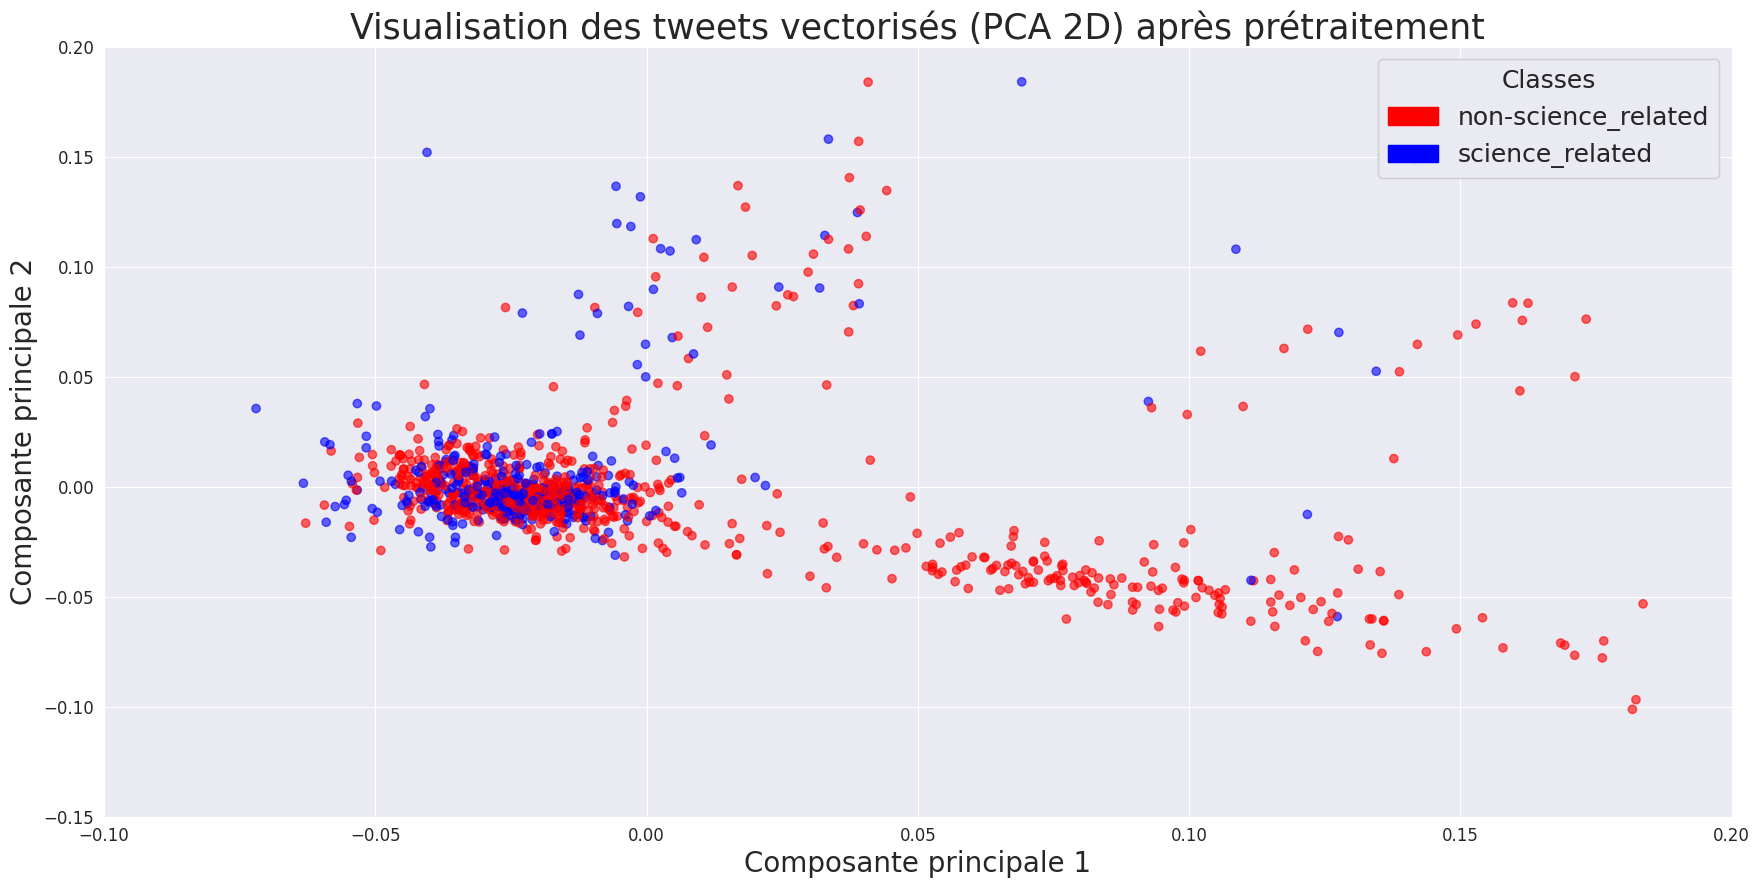

In [51]:
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
import numpy as np


##############################################################################################
#X = remake_sentences(filtered_words)  # Utiliser uniquement la colonne 'text' comme feature
X = df["cleaned_text"]
y_binary = df['science_related']  # Étiquette binaire (scientifique ou non)


X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=1)

vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=100000)
X_vec = vectorizer.fit_transform(X)  # Apprentissage et transformation sur l'entraînement

X_train_vec = vectorizer.fit_transform(X_train)  # Apprentissage et transformation sur l'entraînement


X_test_vec = vectorizer.transform(X_test)
##############################################################################################

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_vec.toarray())

# Préparation de la figure
plt.figure(figsize=(21, 10))

# SCATTERPLOT avec couleur en fonction des classes (y_binary)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_binary, cmap=ListedColormap(['red', 'blue']), alpha=0.6)

# LÉGENDE 1 : pour y_binary
# Créer des étiquettes de couleur
class_labels = {0: 'non-science_related', 1: 'science_related'}
unique_classes = np.unique(y_binary)

handles = [
    mpatches.Patch(color=scatter.cmap(scatter.norm(cls)), label=class_labels[cls])
    for cls in unique_classes
]

legend1 = plt.legend(handles=handles, title='Classes', loc='upper right', prop={'size': 18}, title_fontsize=18)
plt.gca().add_artist(legend1)

# Ajouter les lignes rouges (zones de découpe)
#v1 = plt.axvline(x=-0.06, color='black', linestyle='--', linewidth=2)
#v2 = plt.axvline(x=0, color='black', linestyle='--', linewidth=2)
#h1 = plt.axhline(y=0.07, color='black', linestyle='--')
#h2 = plt.axhline(y=-0.05, color='black', linestyle='--')



# TITRES ET LABELS
plt.title('Visualisation des tweets vectorisés (PCA 2D) après prétraitement', fontsize = 25)
plt.xlabel('Composante principale 1', fontsize = 20)
plt.ylabel('Composante principale 2', fontsize = 20)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.ylim(-0.15, 0.2)
plt.xlim(-0.1, 0.2)

plt.xlim

plt.show()


## - Deuxième classification

In [52]:
%reset -f
%clear

In [53]:
import pandas as pd
df = pd.read_csv('scitweets_export.tsv', sep='\t')

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import nltk

#nltk.download('wordnet')
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('stopwords')

from nltk.corpus import stopwords
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import nltk
# ------------------------------------------------------------
# ÉTAPE 2 : Classification Binaire Multi-Label - sans equilibre les calsse 
# ------------------------------------------------------------

from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, f1_score
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier


stop_words = set(stopwords.words('english'))
custom_stop_words = {"http", "https", "rt", "co", "amp", "via"}
stop_words.update(custom_stop_words)
lemmatizer = WordNetLemmatizer()

def preprocess_tweet(tweet):
    # 1. Supprime mentions (@) et caractères spéciaux
    #tweet = re.sub(r"@\w+|\W", " ", tweet)
    # 2. Convertit en minuscules
    tweet = tweet.lower()
    # 3. Tokenization et lemmatisation
    tokens = word_tokenize(tweet)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    # 4. Recombine en texte
    return " ".join(tokens)


# 1. Préparation des données (tweets scientifiques uniquement)
sci_df = df[df['science_related'] == 1].copy()

# 2. Création des DEUX colonnes cibles (peuvent valoir 1 simultanément)
sci_df['is_claim_or_ref'] = ((sci_df['scientific_claim'] == 1) | (sci_df['scientific_reference'] == 1)).astype(int)
sci_df['is_context'] = (sci_df['scientific_context'] == 1).astype(int)

# Afficher les combinaisons possibles
print("Distribution des combinaisons :")
print(sci_df[['is_claim_or_ref', 'is_context']].value_counts())

Distribution des combinaisons :
is_claim_or_ref  is_context
1                1             218
                 0             124
0                1              33
Name: count, dtype: int64


In [55]:
%reset -f
%clear

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import nltk

#nltk.download('wordnet')
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('stopwords')

from nltk.corpus import stopwords
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import nltk

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Importations nécessaires
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score, KFold
from sklearn.naive_bayes import MultinomialNB

import matplotlib as mpl

In [57]:
df = pd.read_csv('scitweets_export.tsv', sep='\t')


Optimisation de SVM
Fitting 10 folds for each of 6 candidates, totalling 60 fits


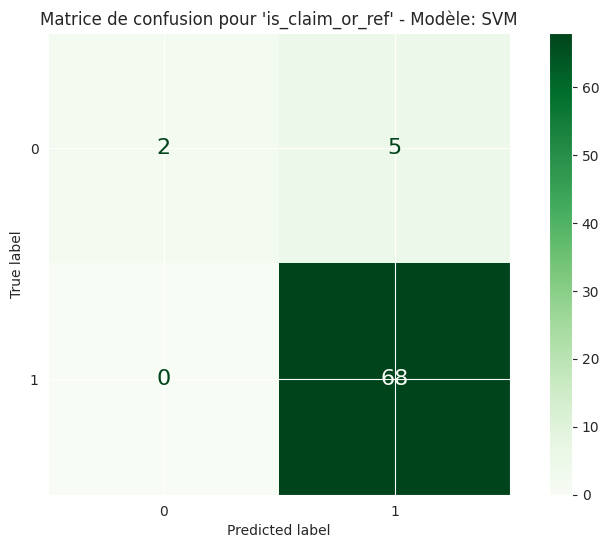

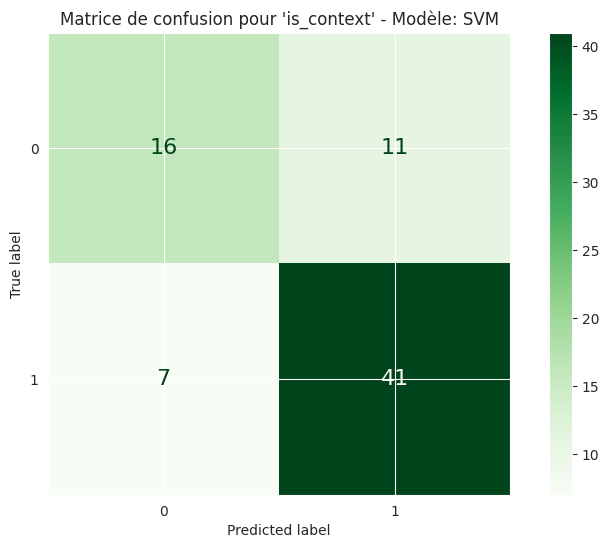


Top 50 features importantes pour le modèle: SVM

--- Top features pour la classe 'claim_or_ref' ---
(i) Ce modèle ne supporte pas l'extraction directe des features importantes.

--- Top features pour la classe 'context' ---
(i) Ce modèle ne supporte pas l'extraction directe des features importantes.

Top 50 features importantes pour le modèle: SVM

--- Top features pour la classe 'claim_or_ref' ---
(i) Ce modèle ne supporte pas l'extraction directe des features importantes.

--- Top features pour la classe 'context' ---
(i) Ce modèle ne supporte pas l'extraction directe des features importantes.

Rapport de classification:
              precision    recall  f1-score   support

claim_or_ref       0.97      1.00      0.99       342
     context       0.95      0.97      0.96       251

   micro avg       0.96      0.99      0.97       593
   macro avg       0.96      0.99      0.97       593
weighted avg       0.96      0.99      0.97       593
 samples avg       0.97      0.99      0.9

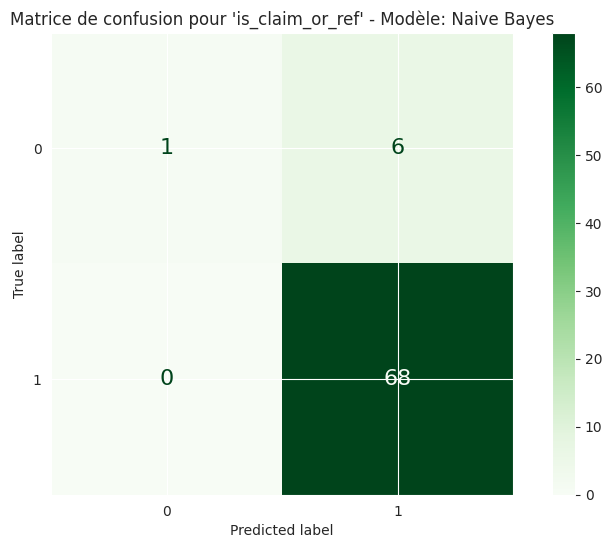

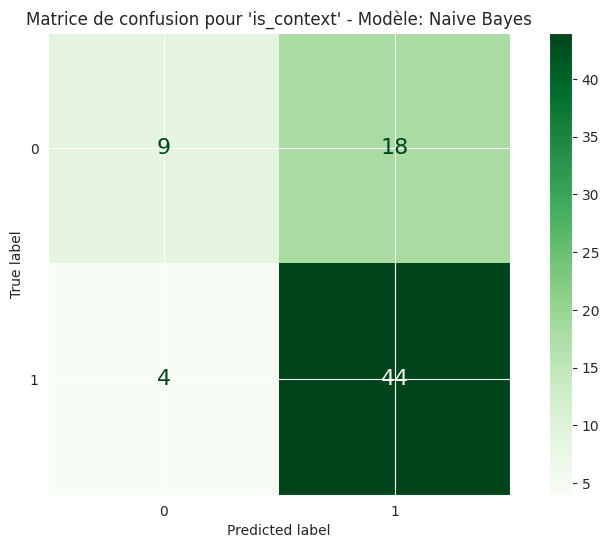


Top 50 features importantes pour le modèle: Naive Bayes

--- Top features pour la classe 'claim_or_ref' ---
(i) Ce modèle ne supporte pas l'extraction directe des features importantes.

--- Top features pour la classe 'context' ---
(i) Ce modèle ne supporte pas l'extraction directe des features importantes.

Top 50 features importantes pour le modèle: Naive Bayes

--- Top features pour la classe 'claim_or_ref' ---
(i) Ce modèle ne supporte pas l'extraction directe des features importantes.

--- Top features pour la classe 'context' ---
(i) Ce modèle ne supporte pas l'extraction directe des features importantes.

Rapport de classification:
              precision    recall  f1-score   support

claim_or_ref       0.94      0.99      0.96       342
     context       0.83      0.94      0.88       251

   micro avg       0.89      0.97      0.93       593
   macro avg       0.88      0.96      0.92       593
weighted avg       0.89      0.97      0.93       593
 samples avg       0.90   

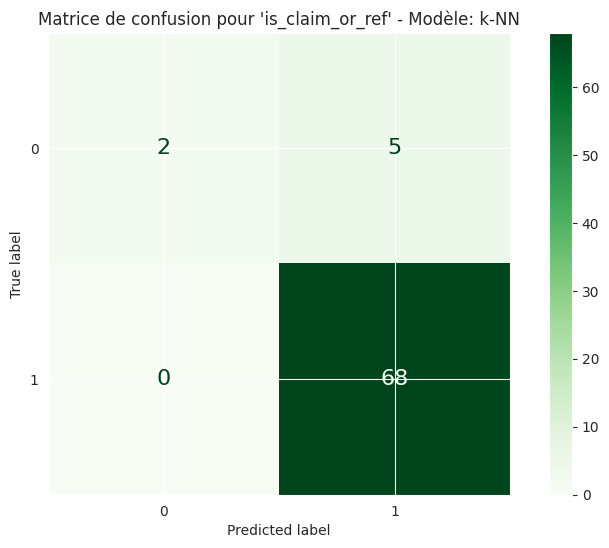

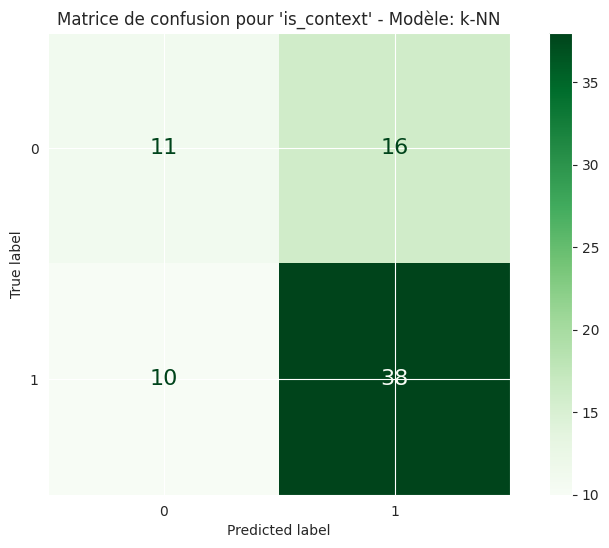


Top 50 features importantes pour le modèle: k-NN

--- Top features pour la classe 'claim_or_ref' ---
(i) Ce modèle ne supporte pas l'extraction directe des features importantes.

--- Top features pour la classe 'context' ---
(i) Ce modèle ne supporte pas l'extraction directe des features importantes.

Top 50 features importantes pour le modèle: k-NN

--- Top features pour la classe 'claim_or_ref' ---
(i) Ce modèle ne supporte pas l'extraction directe des features importantes.

--- Top features pour la classe 'context' ---
(i) Ce modèle ne supporte pas l'extraction directe des features importantes.

Rapport de classification:
              precision    recall  f1-score   support

claim_or_ref       0.98      1.00      0.99       342
     context       0.91      0.96      0.93       251

   micro avg       0.95      0.98      0.96       593
   macro avg       0.94      0.98      0.96       593
weighted avg       0.95      0.98      0.96       593
 samples avg       0.96      0.98      0

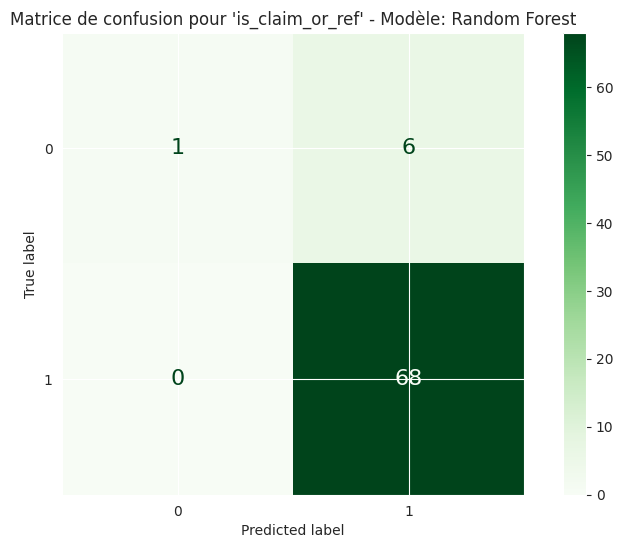

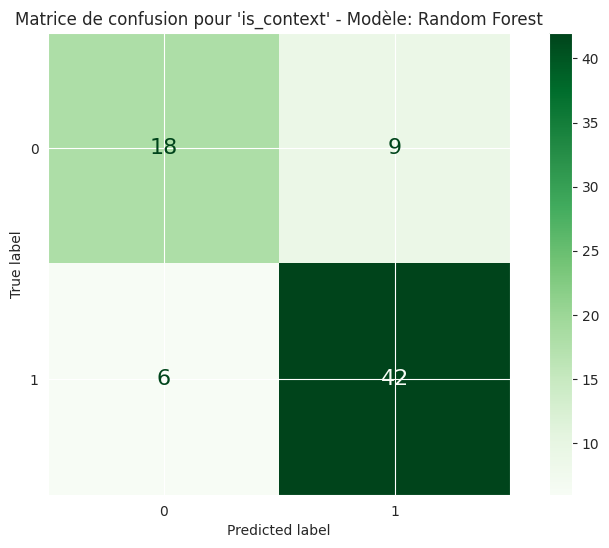


Top 50 features importantes pour le modèle: Random Forest

--- Top features pour la classe 'claim_or_ref' ---
[('science',), ('co',), ('support',), ('research',), ('study',), ('science co',), ('000',), ('article',), ('evidence',), ('non',), ('first',), ('would',), ('take',), ('help',), ('public',), ('future',), ('depression',), ('human',), ('make',), ('community',), ('see',), ('cancer',), ('life',), ('find',), ('million',), ('new',), ('mental',), ('work',), ('health',), ('physical',), ('report',), ('treatment',), ('may',), ('scientist',), ('could',), ('important',), ('day',), ('impact',), ('blood',), ('read',), ('people',), ('american',), ('men',), ('drug',), ('increase',), ('reduces',), ('change',), ('like',), ('case',), ('world',)]

--- Top features pour la classe 'context' ---
[('co',), ('increase',), ('help',), ('lead',), ('stop',), ('study',), ('people',), ('may',), ('specie',), ('many',), ('life',), ('know',), ('change',), ('new',), ('cause',), ('see',), ('important',), ('suppor

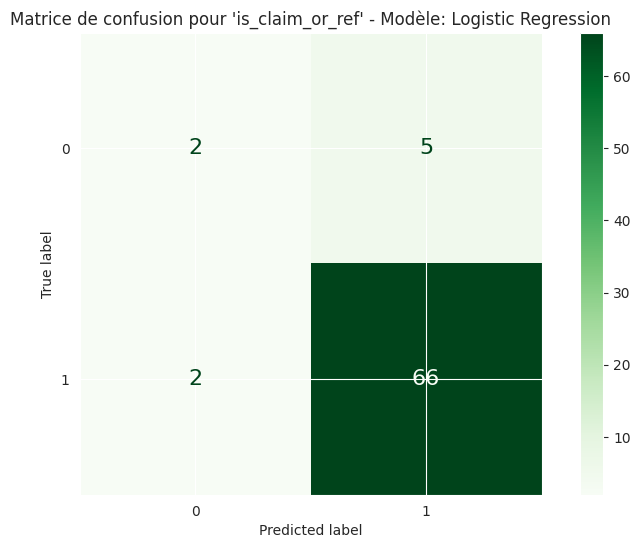

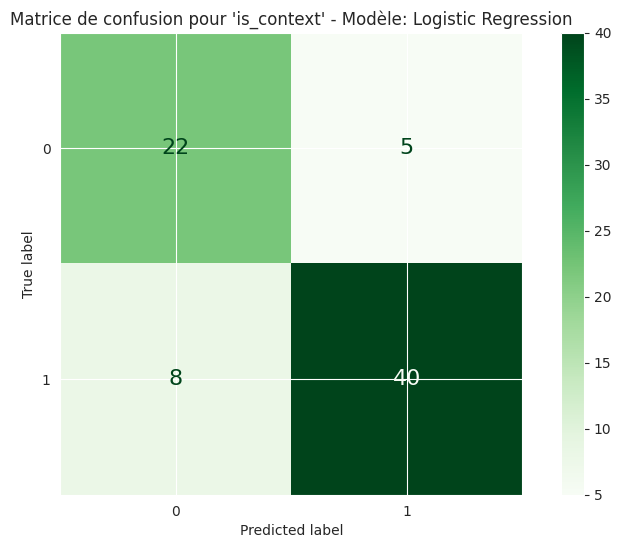


Top 50 features importantes pour le modèle: Logistic Regression

--- Top features pour la classe 'claim_or_ref' ---
[('support',), ('take',), ('public',), ('would',), ('evidence',), ('article',), ('future',), ('first',), ('study',), ('non',), ('000',), ('science',), ('research',), ('co',), ('human',), ('report',), ('see',), ('work',), ('better',), ('people',), ('physical',), ('american',), ('increase',), ('woman',), ('life',), ('science co',), ('great',), ('blood',), ('data',), ('mental',), ('read',), ('year',), ('community',), ('health',), ('show',), ('may',), ('million',), ('action',), ('medical',), ('harm',), ('risk',), ('make',), ('might',), ('key',), ('change',), ('new',), ('today',), ('scientist',), ('help',), ('depression',)]

--- Top features pour la classe 'context' ---
[('cell',), ('study',), ('lead',), ('increase',), ('many',), ('lower',), ('research',), ('climate change',), ('report',), ('scientist',), ('eurekamag',), ('like',), ('stop',), ('problem',), ('evidence',), ('cl

/media/raphael/RawStorage/M1/HAI817I - Machine learning/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


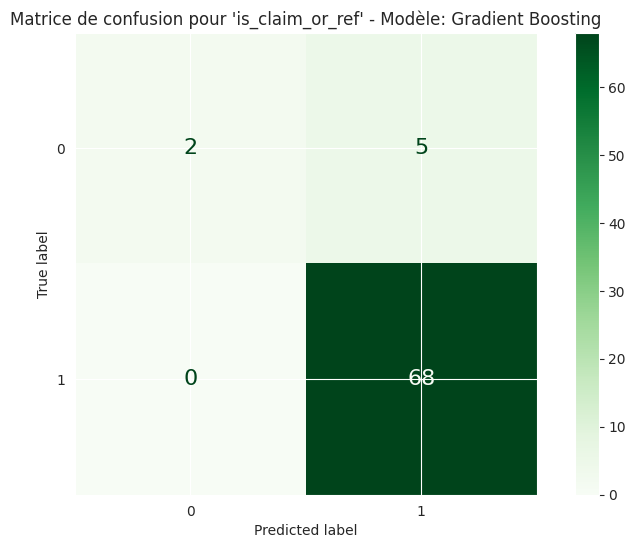

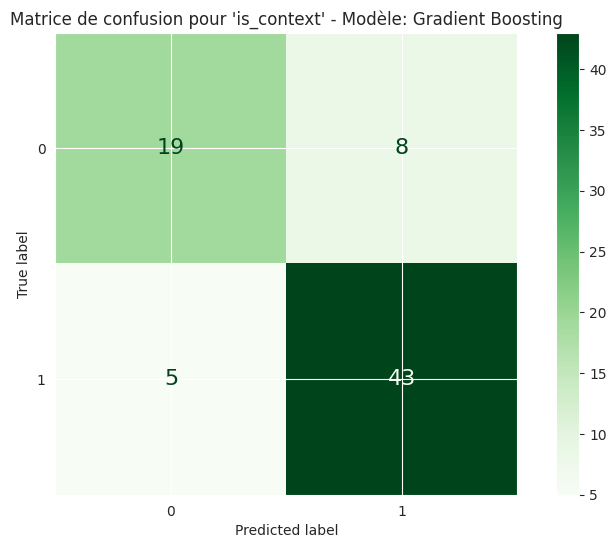


Top 50 features importantes pour le modèle: Gradient Boosting

--- Top features pour la classe 'claim_or_ref' ---
[('science',), ('support',), ('co',), ('research',), ('take',), ('would',), ('article',), ('study',), ('000',), ('first',), ('public',), ('non',), ('evidence',), ('human',), ('american',), ('report',), ('help',), ('may',), ('future',), ('community',), ('new',), ('scientist',), ('better',), ('find',), ('work',), ('science co',), ('treatment',), ('could',), ('physical',), ('important',), ('life',), ('cancer',), ('make',), ('day',), ('high',), ('eurekamag',), ('emotional',), ('effect',), ('health',), ('heart',), ('harm',), ('growth',), ('found',), ('great',), ('free',), ('getting',), ('going',), ('good',), ('drug',), ('coronavirus',)]

--- Top features pour la classe 'context' ---
[('co',), ('increase',), ('help',), ('study',), ('many',), ('lead',), ('specie',), ('research',), ('may',), ('know',), ('marijuana',), ('state',), ('life',), ('could',), ('stop',), ('change',), ('sc

In [58]:
"""
Ce script implémente une classification multi-label pour catégoriser des tweets scientifiques selon deux dimensions :
1) Claim/Reference (affirmation ou référence scientifique)
2) Context (contexte scientifique)

FONCTIONNEMENT PRINCIPAL :

1. PRÉTRAITEMENT DES DONNÉES :
   - Nettoie le texte (minuscules, suppression stopwords, lemmatisation)
   - Filtre les tweets scientifiques (science_related == 1)
   - Crée deux labels binaires :
     * is_claim_or_ref: 1 si le tweet contient une affirmation ou référence scientifique
     * is_context: 1 si le tweet fournit un contexte scientifique

2. VECTORISATION :
   - Convertit le texte en features numériques via TF-IDF
   - Utilise des uni+bigrammes avec seuils min/max de fréquence
   - Limite à 10 000 features maximum pour éviter la malédiction de la dimension

3. ÉQUILIBRAGE DES DONNÉES :
   - Implémente un rééchantillonnage manuel spécifique au multi-label :
     * Identifie toutes les combinaisons de labels possibles
     * Suréchantillonne les combinaisons sous-représentées
   - Permet de gérer les déséquilibres entre classes

4. MODÉLISATION :
   - Teste plusieurs algorithmes classiques (SVM, RandomForest, Logistic Regression etc.)
   - Chaque modèle est encapsulé dans un MultiOutputClassifier pour gérer le multi-label
   - Utilise GridSearchCV pour optimiser les hyperparamètres

5. ÉVALUATION :
   - Validation croisée (10 folds) pour estimer la performance généralisable
   - Mesure l'accuracy globale et par label
   - Génère des rapports détaillés (precision, recall, f1-score)

CARACTÉRISTIQUES CLÉS :
- Gère les tweets pouvant appartenir à plusieurs catégories simultanément
- Préserve les relations entre labels pendant l'équilibrage
- Évite le surapprentissage par des paramètres conservateurs (max_df, min_df)
- Permet de comparer objectivement plusieurs algorithmes

UTILISATION TYPIQUE :
1. Charger un DataFrame pandas contenant les tweets et labels
2. Exécuter le script pour entraîner et évaluer les modèles
3. Analyser les rapports de classification pour sélectionner le meilleur modèle
"""



import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import GridSearchCV
from scipy.sparse import vstack
from sklearn.ensemble import GradientBoostingClassifier
import json

# 1. Préparation des données
stop_words = set(stopwords.words('english'))
custom_stop_words = {"http", "https", "rt", "co", "amp", "via"}
stop_words.update(custom_stop_words)
lemmatizer = WordNetLemmatizer()

def preprocess_tweet(tweet):
    tweet = tweet.lower()
    tokens = word_tokenize(tweet)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

# 2. Chargement et préparation
sci_df = df[df['science_related'] == 1].copy()
sci_df['is_claim_or_ref'] = ((sci_df['scientific_claim'] == 1) | (sci_df['scientific_reference'] == 1))
sci_df['is_context'] = (sci_df['scientific_context'] == 1)
sci_df['cleaned_text'] = sci_df['text'].apply(preprocess_tweet)

# 3. Vectorisation
vectorizer = TfidfVectorizer(
    ngram_range=(1, 2),  # Réduit à bigrammes pour plus de stabilité
    max_features=10000,
    min_df=5,
    max_df=0.85
)
X = vectorizer.fit_transform(sci_df['cleaned_text'])
y = sci_df[['is_claim_or_ref', 'is_context']].values

feature_names = np.array(vectorizer.get_feature_names_out())


# 4. Rééchantillonnage manuel pour multi-label
def multilabel_oversample(X, y, random_state=None):
    np.random.seed(random_state)
    
    # Compter les occurrences de chaque combinaison de labels
    unique_labels, counts = np.unique(y, axis=0, return_counts=True)
    max_count = max(counts)
    
    resampled_X = []
    resampled_y = []
    
    for label_combination in unique_labels:
        indices = np.where((y == label_combination).all(axis=1))[0]
        n_samples = len(indices)
        
        # Suréchantillonnage seulement pour les classes minoritaires
        if n_samples < max_count:
            n_to_add = max_count - n_samples
            selected = np.random.choice(indices, size=n_to_add, replace=True)
            
            resampled_X.append(X[selected])
            resampled_y.append(y[selected])
    
    if resampled_X:
        return vstack([X] + resampled_X), np.vstack([y] + resampled_y)
    return X, y

X_res, y_res = multilabel_oversample(X, y, random_state=42)

# 5. Configuration des modèles avec class_weight
models = {
    "SVM": {
        "model": SVC(probability=True),
        "params": {
            'estimator__C': [0.1, 1, 10],
            'estimator__kernel': ['linear', 'rbf']
        }
    },
    "Naive Bayes": {
        "model": MultinomialNB(),
        "params": {
            'estimator__alpha': [0.1, 0.5, 1.0],
            'estimator__fit_prior': [True, False]
        }
    },
    "k-NN": {
        "model": KNeighborsClassifier(),
        "params": {
            'estimator__n_neighbors': [3, 5, 7],
            'estimator__weights': ['uniform', 'distance'],
            'estimator__metric': ['euclidean', 'cosine']
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            'estimator__n_estimators': [50, 100],
            'estimator__max_depth': [None, 10, 20],
            'estimator__min_samples_split': [2, 5]
        }
    },
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=1000),
        "params": {
            'estimator__C': [0.1, 1, 10],
            'estimator__penalty': ['l1', 'l2'],
            'estimator__solver': ['liblinear']
        }
    },
    "Gradient Boosting": {
        "model": GradientBoostingClassifier(random_state=42),
        "params": {
            'estimator__n_estimators': [50, 100],
            'estimator__learning_rate': [0.01, 0.1],
            'estimator__max_depth': [3, 5]
        }
    }
}

# 6. Évaluation avec KFold
kf = KFold(n_splits=10, shuffle=True, random_state=42)
scorer = make_scorer(lambda y_true, y_pred: np.mean(y_true == y_pred))

to_plot = {}
confused = {}
for name, config in models.items():
    print(f"\n{'='*60}")
    print(f"Optimisation de {name}")
    print(f"{'='*60}")
    
    model = MultiOutputClassifier(config['model'])
    
    grid = GridSearchCV(
        model,
        param_grid=config['params'],
        cv=kf,
        scoring=scorer,
        n_jobs=-1,
        verbose=1
    )
    
    grid.fit(X_res, y_res)
    
    
    ##########################################################################
    
    #Heatmap
    
    mpl.rcParams['figure.figsize'] = [10.0, 6.0]

    
    # Split les données pour évaluer et afficher la matrice de confusion
    X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fit le meilleur modèle sur les données d'entraînement
    grid.best_estimator_.fit(X_train_sub, y_train_sub)

    # Prédiction
    y_pred = grid.best_estimator_.predict(X_test_sub)

    # Afficher la matrice de confusion pour chaque label séparément
    label_names = ['is_claim_or_ref', 'is_context']

    confused[name] = {}
    for i in range(y.shape[1]):
        cm = confusion_matrix(y_test_sub[:, i], y_pred[:, i])
        confused[name][label_names[i]] = [[int(cm[0][0]), int(cm[0][1])],
                                         [int(cm[1][0]), int(cm[1][1])]]
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
        disp.plot(cmap='Greens')
        plt.title(f"Matrice de confusion pour '{label_names[i]}' - Modèle: {name}")
        
        
    
        for text in disp.text_.ravel():
            text.set_fontsize(16)
        
        
        plt.show()
    
    
    ##########################################################################
    ##########################################################################
    
    print(f"\nTop 50 features importantes pour le modèle: {name}")
    best_model = grid.best_estimator_

    for i, label in enumerate(['claim_or_ref', 'context']):
        print(f"\n--- Top features pour la classe '{label}' ---")
        estimator = best_model.estimators_[i]
    
        if hasattr(estimator, 'coef_'):
            # Pour LogisticRegression
            coefs = estimator.coef_.flatten()
            top_indices = np.argsort(np.abs(coefs))[-50:][::-1]
            top_features = feature_names[top_indices]
            #print(list(zip(top_features, coefs[top_indices])))
            print(list(zip(top_features)))

        elif hasattr(estimator, 'feature_importances_'):
            # Pour RandomForest ou GradientBoosting
            importances = estimator.feature_importances_
            top_indices = np.argsort(importances)[-50:][::-1]
            top_features = feature_names[top_indices]
            #print(list(zip(top_features, importances[top_indices])))
            print(list(zip(top_features)))
            
        else:
            print(f"(i) Ce modèle ne supporte pas l'extraction directe des features importantes.")
    
    ##########################################################################
    ##########################################################################
    ##########################################################################
    
    print(f"\nTop 50 features importantes pour le modèle: {name}")
    best_model = grid.best_estimator_

    for i, label in enumerate(['claim_or_ref', 'context']):
        print(f"\n--- Top features pour la classe '{label}' ---")
        estimator = best_model.estimators_[i]
    
        if hasattr(estimator, 'coef_'):
            # Pour LogisticRegression
            coefs = estimator.coef_.flatten()
            top_indices = np.argsort(np.abs(coefs))[-50:][::-1]
            top_features = feature_names[top_indices]
            #print(list(zip(top_features, coefs[top_indices])))
            print(list(zip(top_features)))

        elif hasattr(estimator, 'feature_importances_'):
            # Pour RandomForest ou GradientBoosting
            importances = estimator.feature_importances_
            top_indices = np.argsort(importances)[-50:][::-1]
            top_features = feature_names[top_indices]
            #print(list(zip(top_features, importances[top_indices])))
            print(list(zip(top_features)))
            
        else:
            print(f"(i) Ce modèle ne supporte pas l'extraction directe des features importantes.")
    
    ##########################################################################
    
    # Évaluation
    y_pred = grid.predict(X)
    print("\nRapport de classification:")
    print(classification_report(y, y_pred, target_names=['claim_or_ref', 'context']))
    
    # Validation croisée
    cv_scores = cross_val_score(grid.best_estimator_, X_res, y_res, cv=kf, scoring=scorer)
    print(f"\nCV Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")
    print(f"Meilleurs paramètres: {grid.best_params_}")
    to_plot[name] = [float(x) for x in cv_scores]

with open('model_comparison_2.json', 'w') as f:
    f.write(json.dumps({"keys": list(to_plot.keys()), "values": list(to_plot.values())}))

with open('confusion_2.json', 'w') as f:
    f.write(json.dumps({"keys": list(confused.keys()), "values": list(confused.values())}))



## - Troisième classification

In [59]:
%reset -f
%clear

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import nltk

#nltk.download('wordnet')
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('stopwords')

from nltk.corpus import stopwords
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import nltk

In [61]:
df = pd.read_csv('scitweets_export.tsv', sep='\t')


Optimisation de LinearSVC
Fitting 10 folds for each of 4 candidates, totalling 40 fits

Meilleurs paramètres: {'estimator__C': 1, 'estimator__penalty': 'l1'}

Performance sur le TEST SET:
              precision    recall  f1-score   support

       claim       0.83      0.80      0.81        54
   reference       0.67      0.72      0.69        39
     context       0.85      0.73      0.79        48

   micro avg       0.79      0.75      0.77       141
   macro avg       0.78      0.75      0.76       141
weighted avg       0.79      0.75      0.77       141
 samples avg       0.84      0.82      0.78       141



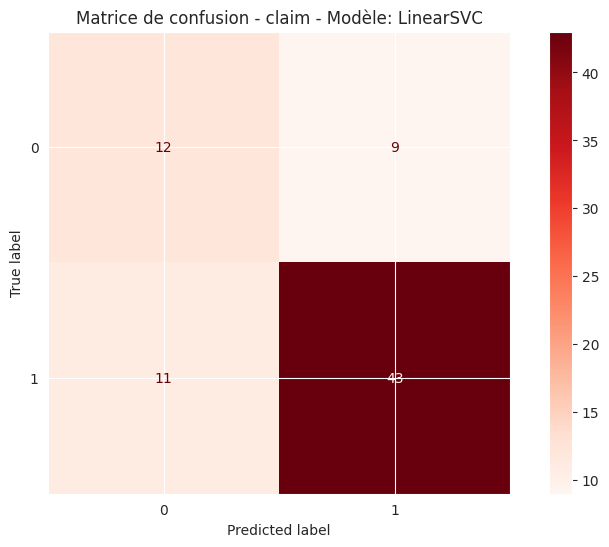

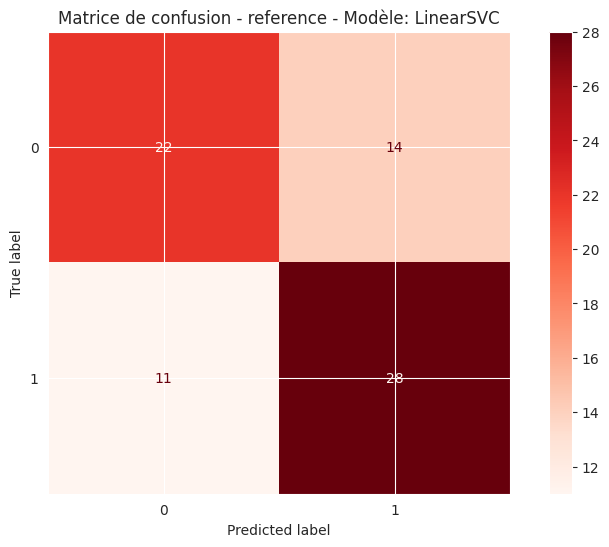

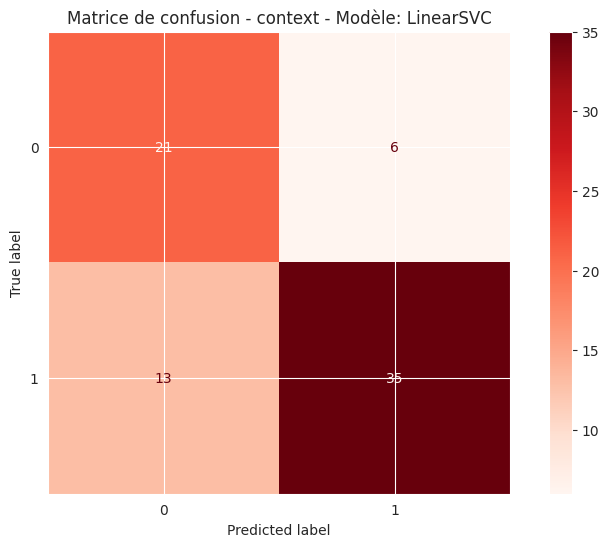


Top 50 features importantes pour le modèle: {name}

--- Top features pour la classe 'claim' ---
[('conference',), ('research',), ('url',), ('case',), ('grant',), ('vitro',), ('increase',), ('medical',), ('2018',), ('post',), ('science',), ('funding',), ('non',), ('say',), ('public',), ('coronavirus',), ('oral',), ('eurekamag',), ('drug',), ('transmission',), ('scientist',), ('url url url',), ('2014',), ('disease',), ('year',), ('article',), ('finding',), ('twice',), ('program',), ('site',), ('work',), ('rise',), ('based',), ('discover',), ('read',), ('moon',), ('know',), ('planet',), ('look',), ('despite',), ('future',), ('support',), ('key',), ('blog',), ('speaking',), ('blood',), ('side',), ('bone',), ('service',), ('social',)]

--- Top features pour la classe 'reference' ---
[('url',), ('symptom',), ('increase',), ('journal',), ('april',), ('great',), ('use',), ('transmission',), ('may',), ('level',), ('latest',), ('eurekamag',), ('rise',), ('cell',), ('helped',), ('ptsd',), ('scie

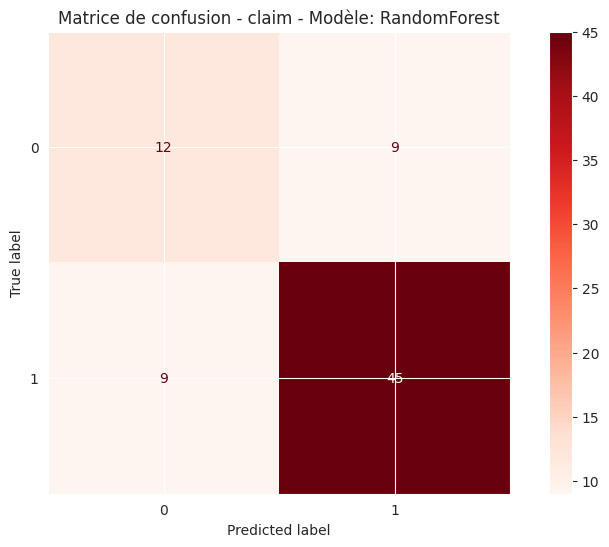

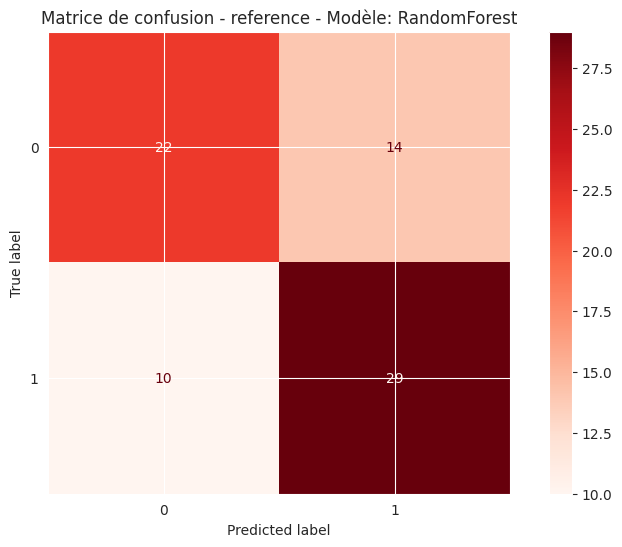

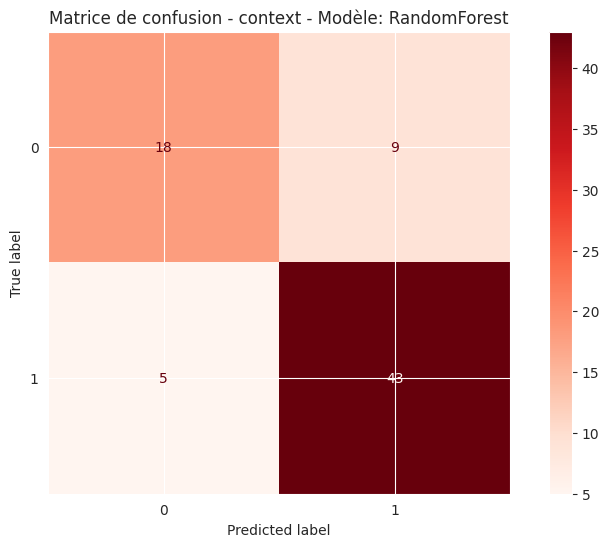


Top 50 features importantes pour le modèle: {name}

--- Top features pour la classe 'claim' ---
[('url',), ('science',), ('research',), ('study',), ('conference',), ('increase',), ('scientist',), ('url url',), ('eurekamag',), ('science url',), ('support',), ('new',), ('cancer',), ('april',), ('people',), ('could',), ('non',), ('change',), ('article',), ('vitro',), ('future',), ('one',), ('transmission',), ('evidence',), ('help',), ('find',), ('medical',), ('planet',), ('research url',), ('blog',), ('based',), ('case',), ('five',), ('funding',), ('woman',), ('2018',), ('brain',), ('according',), ('know',), ('first',), ('health',), ('structure',), ('rise',), ('treatment',), ('culture',), ('another',), ('relationship',), ('risk',), ('lead',), ('earth',)]

--- Top features pour la classe 'reference' ---
[('url',), ('science',), ('support',), ('url url',), ('study',), ('increase',), ('rise',), ('scientist',), ('help',), ('april',), ('eurekamag',), ('life',), ('research',), ('moon',), ('fiv

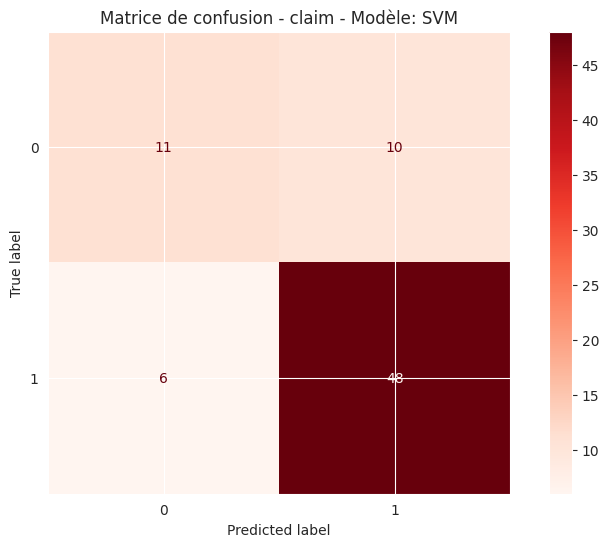

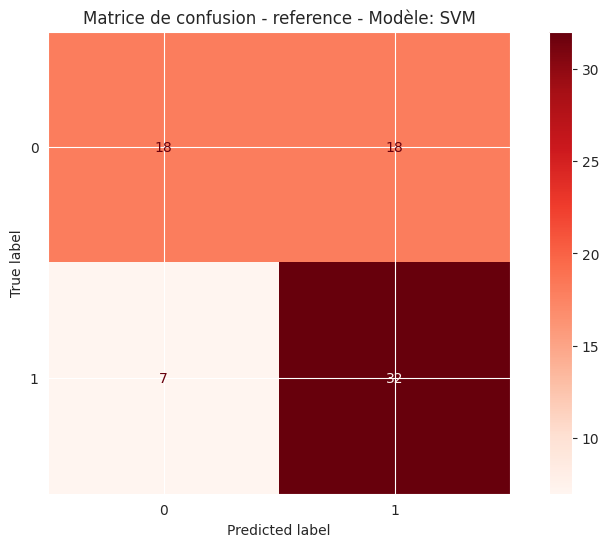

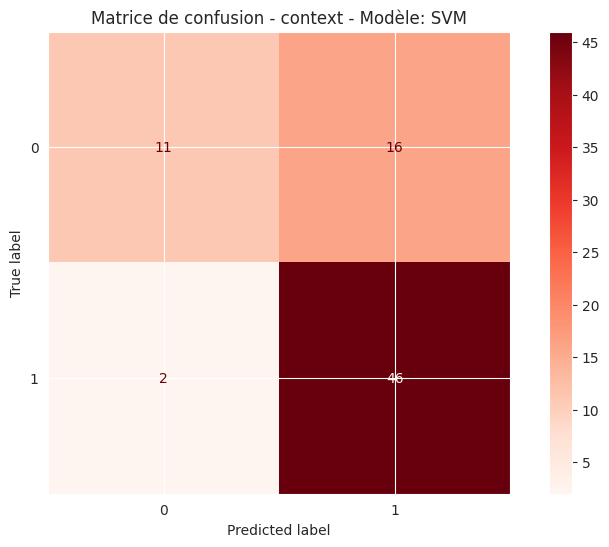


Top 50 features importantes pour le modèle: {name}

--- Top features pour la classe 'claim' ---
Pas d'attribut de feature importance pour SVC

--- Top features pour la classe 'reference' ---
Pas d'attribut de feature importance pour SVC

--- Top features pour la classe 'context' ---
Pas d'attribut de feature importance pour SVC

CV F1-Score (micro): 0.8992 ± 0.0691

 accuracy : 0.7331 ± 0.0691
Hamming Loss: 0.26222222222222225

Optimisation de Naive Bayes
Fitting 10 folds for each of 6 candidates, totalling 60 fits

Meilleurs paramètres: {'estimator__alpha': 1.0, 'estimator__fit_prior': True}

Performance sur le TEST SET:
              precision    recall  f1-score   support

       claim       0.86      0.81      0.84        54
   reference       0.60      0.62      0.61        39
     context       0.68      1.00      0.81        48

   micro avg       0.72      0.82      0.77       141
   macro avg       0.71      0.81      0.75       141
weighted avg       0.73      0.82      0.76

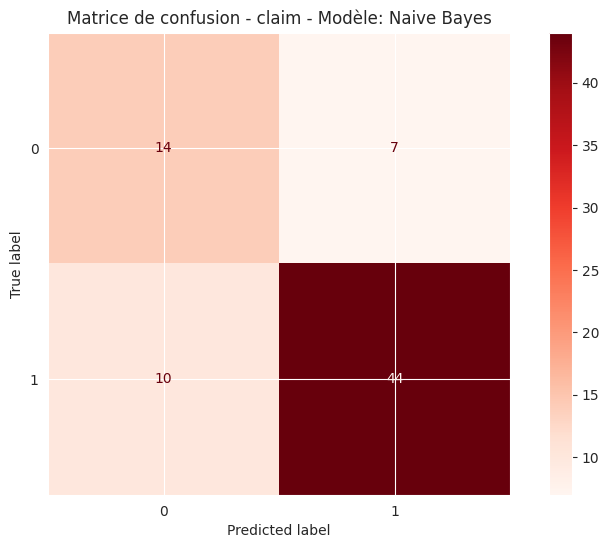

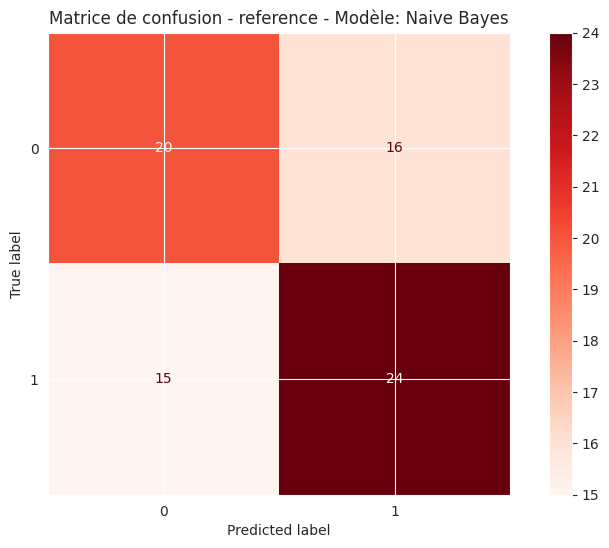

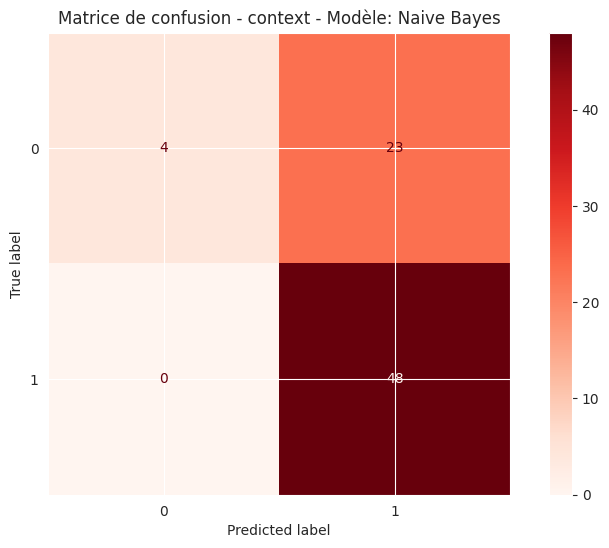


Top 50 features importantes pour le modèle: {name}

--- Top features pour la classe 'claim' ---
Pas d'attribut de feature importance pour MultinomialNB

--- Top features pour la classe 'reference' ---
Pas d'attribut de feature importance pour MultinomialNB

--- Top features pour la classe 'context' ---
Pas d'attribut de feature importance pour MultinomialNB

CV F1-Score (micro): 0.8601 ± 0.0802

 accuracy : 0.6101 ± 0.0802
Hamming Loss: 0.31555555555555553

Optimisation de k-NN
Fitting 10 folds for each of 12 candidates, totalling 120 fits

Meilleurs paramètres: {'estimator__metric': 'cosine', 'estimator__n_neighbors': 7, 'estimator__weights': 'distance'}

Performance sur le TEST SET:
              precision    recall  f1-score   support

       claim       0.86      0.69      0.76        54
   reference       0.57      0.64      0.60        39
     context       0.67      0.96      0.79        48

   micro avg       0.69      0.77      0.73       141
   macro avg       0.70      0.76

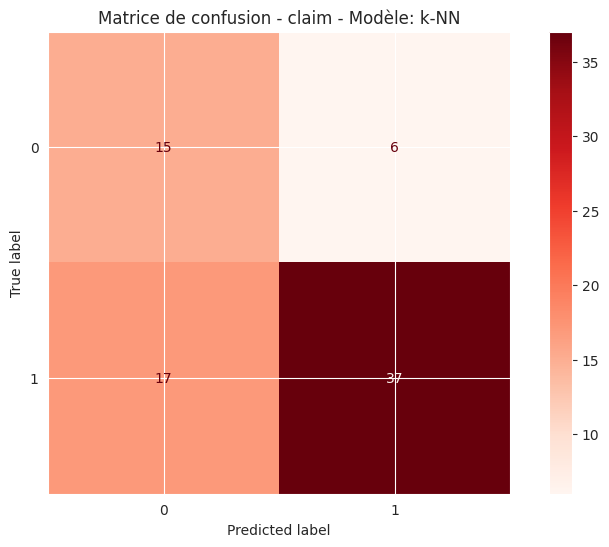

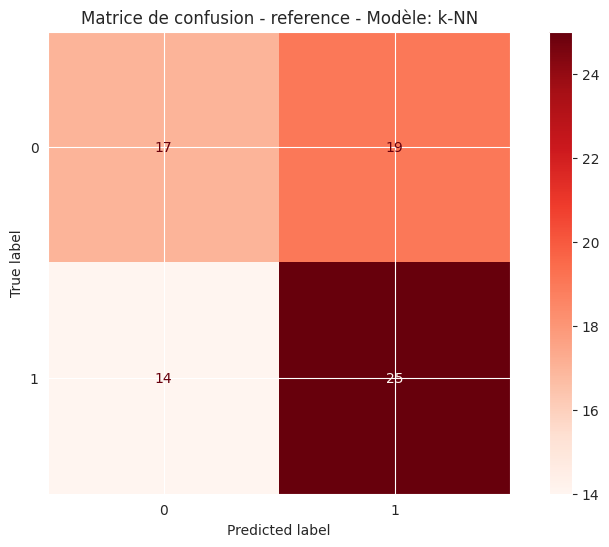

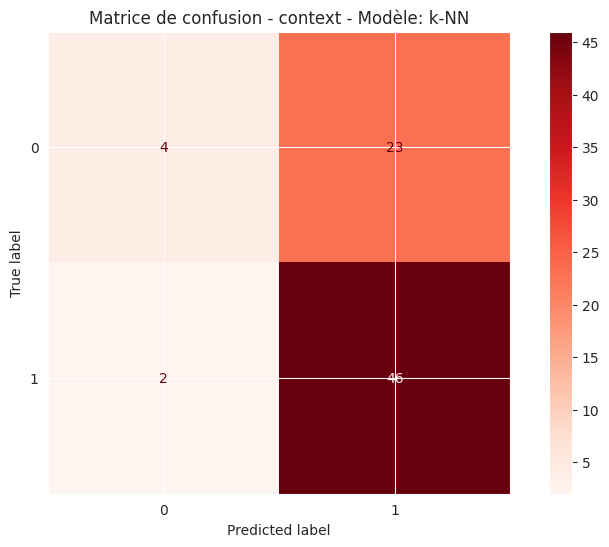


Top 50 features importantes pour le modèle: {name}

--- Top features pour la classe 'claim' ---
Pas d'attribut de feature importance pour KNeighborsClassifier

--- Top features pour la classe 'reference' ---
Pas d'attribut de feature importance pour KNeighborsClassifier

--- Top features pour la classe 'context' ---
Pas d'attribut de feature importance pour KNeighborsClassifier

CV F1-Score (micro): 0.8615 ± 0.0763

 accuracy : 0.6868 ± 0.0763
Hamming Loss: 0.36

Optimisation de Logistic Regression
Fitting 10 folds for each of 6 candidates, totalling 60 fits

Meilleurs paramètres: {'estimator__C': 10, 'estimator__penalty': 'l1', 'estimator__solver': 'liblinear'}

Performance sur le TEST SET:
              precision    recall  f1-score   support

       claim       0.82      0.83      0.83        54
   reference       0.70      0.72      0.71        39
     context       0.85      0.81      0.83        48

   micro avg       0.79      0.79      0.79       141
   macro avg       0.79   

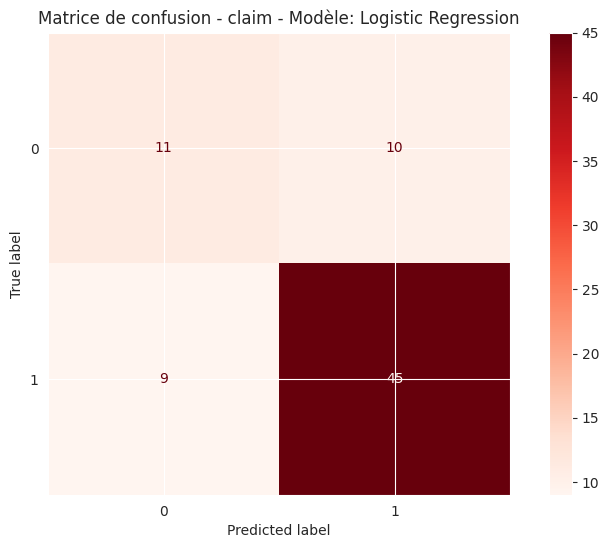

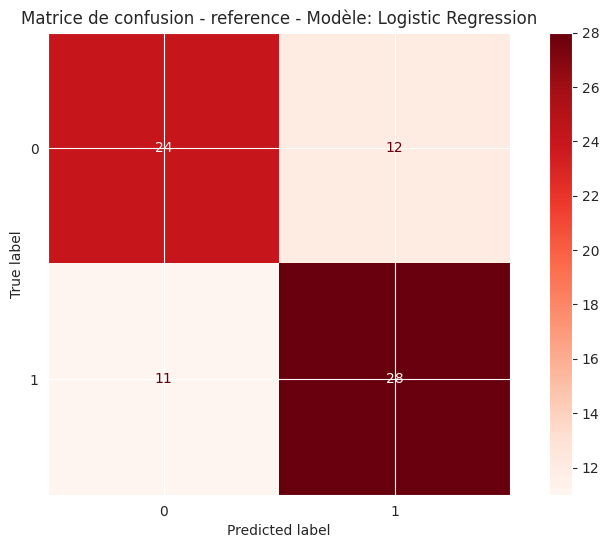

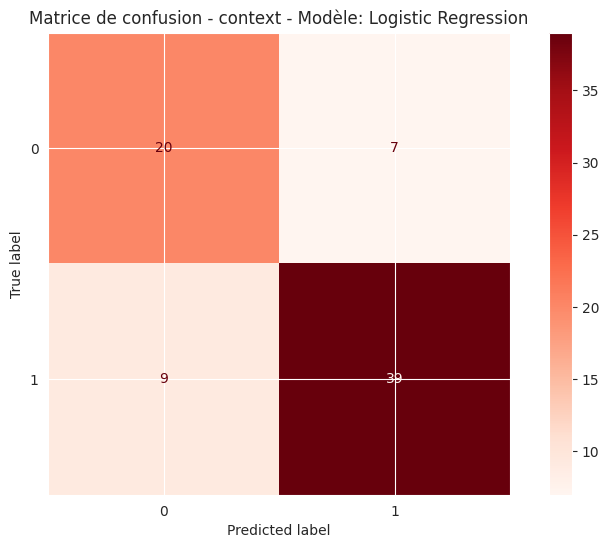


Top 50 features importantes pour le modèle: {name}

--- Top features pour la classe 'claim' ---
[('conference',), ('case',), ('vitro',), ('research',), ('increase',), ('non',), ('post',), ('2018',), ('grant',), ('url',), ('science',), ('medical',), ('2014',), ('work',), ('url url url',), ('oral',), ('drug',), ('service',), ('side',), ('eurekamag',), ('read',), ('transmission',), ('twice',), ('article',), ('funding',), ('say',), ('public',), ('finding',), ('year',), ('program',), ('support',), ('disease',), ('scientist',), ('based',), ('rise',), ('stop',), ('despite',), ('coronavirus',), ('discover',), ('moon',), ('bone',), ('want',), ('planet',), ('treatment',), ('key',), ('new',), ('science url',), ('speaking',), ('health url',), ('effect',)]

--- Top features pour la classe 'reference' ---
[('url',), ('deal',), ('symptom',), ('increase',), ('latest',), ('action',), ('april',), ('like',), ('journal',), ('great',), ('use',), ('ocean',), ('eurekamag',), ('scientist',), ('cell',), ('may

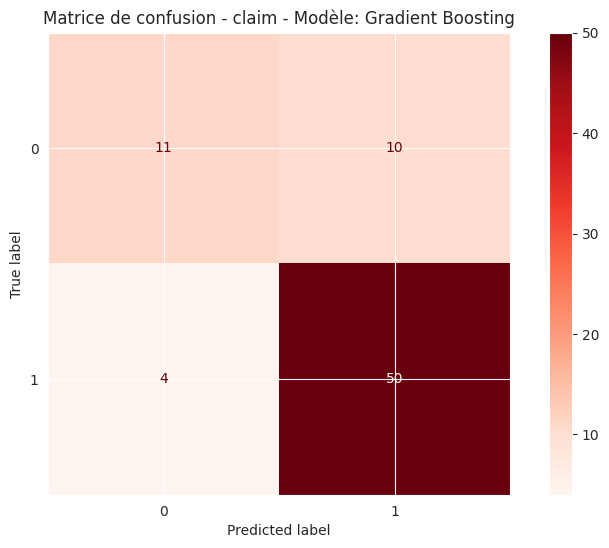

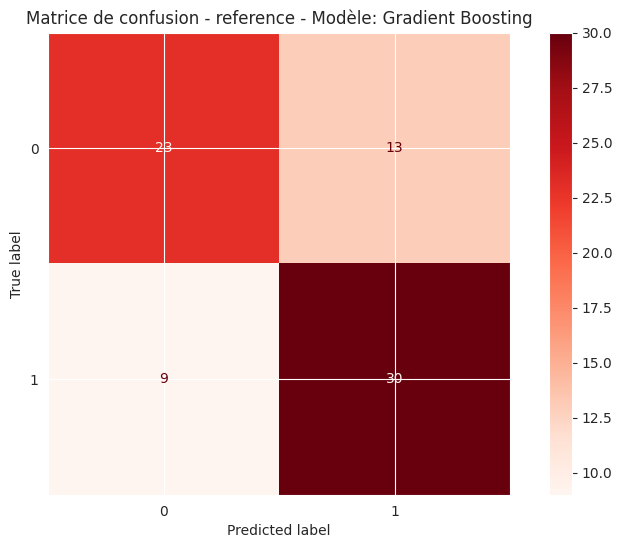

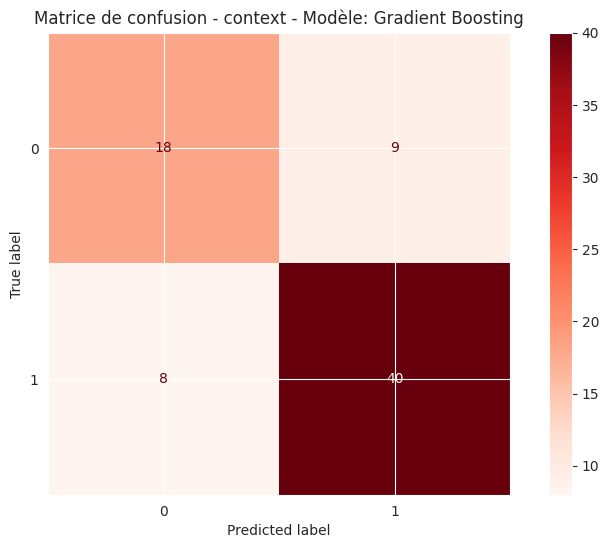


Top 50 features importantes pour le modèle: {name}

--- Top features pour la classe 'claim' ---
[('url',), ('science',), ('research',), ('conference',), ('support',), ('scientist',), ('eurekamag',), ('vitro',), ('increase',), ('could',), ('based',), ('non',), ('study',), ('april',), ('article',), ('funding',), ('2018',), ('culture',), ('read',), ('risk',), ('post',), ('rise',), ('new',), ('analysis',), ('blog',), ('2014',), ('future',), ('cause',), ('moon',), ('discover',), ('look',), ('twice',), ('cancer',), ('love',), ('take',), ('first',), ('side',), ('work',), ('find',), ('people',), ('say',), ('relationship',), ('disease',), ('depression',), ('another',), ('see',), ('latest',), ('oral',), ('url url url',), ('change',)]

--- Top features pour la classe 'reference' ---
[('url',), ('science',), ('scientist',), ('eurekamag',), ('rise',), ('increase',), ('building',), ('five',), ('study',), ('could',), ('conference',), ('program',), ('april',), ('much',), ('research url',), ('help',),

In [63]:
# ------------------------------------------------------------
# SOLUTION FINALE POUR CLASSIFICATION MULTI-LABEL
# Avec gestion du déséquilibre et validation croisée adaptée
# ------------------------------------------------------------
"""le Hamming loss est une métrique utilisée en classification multi-label (comme dans ton cas), 
et elle mesure la proportion de mauvaises prédictions de labels par rapport au nombre total de labels.

"""

import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import GridSearchCV
from scipy.sparse import vstack
from collections import Counter
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import json


# 1. Préparation des données

stop_words = set(stopwords.words('english'))
custom_stop_words = {"rt", "co", "amp", "via"}
#negations = {"not", "no", "nor", "neither", "never", "none"}
stop_words = stop_words #- negations
stop_words.update(custom_stop_words)
lemmatizer = WordNetLemmatizer()

def preprocess_tweet(tweet):
    #tweet = re.sub(r"@\w+|\W", " ", tweet)
    tweet = re.sub(r"(https?://\S+)", " URL ", tweet)
    tweet = tweet.lower()
    tokens = word_tokenize(tweet)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

# 2. Chargement et préparation
sci_df = df[df['science_related'] == 1].copy()
sci_df['cleaned_text'] = sci_df['text'].apply(preprocess_tweet)

# 3. Création des cibles multi-labels
y = sci_df[['scientific_claim', 'scientific_reference', 'scientific_context']].values
X = sci_df['cleaned_text']



# 4. Vectorisation
vectorizer = TfidfVectorizer(
    ngram_range=(1, 3),
    max_features=8000,
    min_df=3,
    max_df=0.85
)
X_vec = vectorizer.fit_transform(X)

feature_names = np.array(vectorizer.get_feature_names_out())

# 5. Séparation train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_vec, y, 
    test_size=0.2,
    random_state=42
)

# 6. Rééchantillonnage manuel adapté au multi-label
def multilabel_oversample(X, y, random_state=None):
    np.random.seed(random_state)
    
    # Compter les occurrences de chaque combinaison de labels
    unique_labels, counts = np.unique(y, axis=0, return_counts=True)
    max_count = max(counts)
    
    resampled_X = []
    resampled_y = []
    
    for label_combination, count in zip(unique_labels, counts):
        indices = np.where((y == label_combination).all(axis=1))[0]
        
        # Suréchantillonnage seulement pour les classes minoritaires
        if count < max_count:
            n_to_add = max_count - count
            selected = np.random.choice(indices, size=n_to_add, replace=True)
            
            resampled_X.append(X[selected])
            resampled_y.append(y[selected])
    
    if resampled_X:
        return vstack([X] + resampled_X), np.vstack([y] + resampled_y)
    return X, y

X_train_res, y_train_res = multilabel_oversample(X_train, y_train, random_state=42)

# 7. Configuration des modèles
models = {
    "LinearSVC": {
        "model": LinearSVC(dual=False, class_weight='balanced'),
        "params": {
            'estimator__C': [0.1, 1],
            'estimator__penalty': ['l1', 'l2']
        }
    },
    "RandomForest": {
        "model": RandomForestClassifier(class_weight='balanced_subsample'),
        "params": {
            'estimator__n_estimators': [100],
            'estimator__max_depth': [10, None],
            'estimator__min_samples_split': [5, 10]
        }
    },
    "SVM": {
        "model": SVC(probability=True),
        "params": {
            'estimator__C': [0.1, 1, 10],
            'estimator__kernel': ['linear', 'rbf']
        }
    },
    "Naive Bayes": {
        "model": MultinomialNB(),
        "params": {
            'estimator__alpha': [0.1, 0.5, 1.0],
            'estimator__fit_prior': [True, False]
        }
    },
    "k-NN": {
        "model": KNeighborsClassifier(),
        "params": {
            'estimator__n_neighbors': [3, 5, 7],
            'estimator__weights': ['uniform', 'distance'],
            'estimator__metric': ['euclidean', 'cosine']
        }
    },
    
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=1000),
        "params": {
            'estimator__C': [0.1, 1, 10],
            'estimator__penalty': ['l1', 'l2'],
            'estimator__solver': ['liblinear']
        }
    },

    "Gradient Boosting": {
        "model": GradientBoostingClassifier(random_state=42),
        "params": {
            'estimator__n_estimators': [50, 100],
            'estimator__learning_rate': [0.01, 0.1],
            'estimator__max_depth': [3, 5]
        }
    }
    
}

# 8. Évaluation avec KFold standard (adapté au multi-label)
kf = KFold(n_splits=10, shuffle=True, random_state=42)
confused = {}
to_plot = {}
for name, config in models.items():
    print(f"\n{'='*60}")
    print(f"Optimisation de {name}")
    print(f"{'='*60}")
    
    model = MultiOutputClassifier(config['model'])
    
    grid = GridSearchCV(
        model,
        param_grid=config['params'],
        cv=kf,
        scoring='f1_micro',
        n_jobs=-1,
        verbose=1
    )
    
    # Entraînement sur données rééchantillonnées
    grid.fit(X_train_res, y_train_res)
    
    # Évaluation sur test set original
    y_pred = grid.predict(X_test)
    
    print(f"\nMeilleurs paramètres: {grid.best_params_}")
    print("\nPerformance sur le TEST SET:")
    print(classification_report(
        y_test, y_pred,
        target_names=['claim', 'reference', 'context'],
        zero_division=0
    ))
    
    ###################################################################
    
    # Afficher une matrice de confusion
    
    # Noms des étiquettes pour chaque colonne
    label_names = ['claim', 'reference', 'context']

    # Boucle sur chaque label (chaque colonne)
    confused[name] = {}
    for i, label in enumerate(label_names):
        cm = confusion_matrix(y_test[:, i], y_pred[:, i])
        confused[name][label_names[i]] = [[int(cm[0][0]), int(cm[0][1])],
                                          [int(cm[1][0]), int(cm[1][1])]]
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
        disp.plot(cmap='Reds')
        plt.title(f"Matrice de confusion - {label} - Modèle: {name}")
        plt.show()
    
    
    
    ###################################################################
    ###################################################################
    
    #Extraire les features les plus important
    
    nombre_de_features = 50
    
    print(f"\nTop", nombre_de_features, "features importantes pour le modèle: {name}")

    # Récupérer le meilleur modèle entraîné
    best_model = grid.best_estimator_

    # Pour chaque sortie (label multi-label), extraire les features importantes
    for i, label in enumerate(['claim', 'reference', 'context']):
        print(f"\n--- Top features pour la classe '{label}' ---")

        estimator = best_model.estimators_[i]  # modèle pour ce label

        if hasattr(estimator, 'coef_'):
            # Pour LinearSVC ou LogisticRegression
            coefs = estimator.coef_.flatten()
            top_indices = np.argsort(np.abs(coefs))[(-1*nombre_de_features):][::-1]
            top_features = feature_names[top_indices]
            #print(list(zip(top_features, coefs[top_indices])))
            print(list(zip(top_features)))


        elif hasattr(estimator, 'feature_importances_'):
            # Pour RandomForest, GradientBoosting
            importances = estimator.feature_importances_
            top_indices = np.argsort(importances)[(-1*nombre_de_features):][::-1]
            top_features = feature_names[top_indices]
            #print(list(zip(top_features, importances[top_indices])))
            print(list(zip(top_features)))

        else:
            print(f"Pas d'attribut de feature importance pour {type(estimator).__name__}")

    
    
    
    ####################################################################
    
    # Scores de validation croisée
    cv_scores = []
    cv_score = []
    for train_idx, test_idx in kf.split(X_train_res):
        X_train_fold, X_val_fold = X_train_res[train_idx], X_train_res[test_idx]
        y_train_fold, y_val_fold = y_train_res[train_idx], y_train_res[test_idx]
        
        model.set_params(**grid.best_params_)
        model.fit(X_train_fold, y_train_fold)
        y_pred_fold = model.predict(X_val_fold)
        
        # Calcul de l'accuracy au lieu du F1-score
        cv_scores.append(accuracy_score(y_val_fold, y_pred_fold))
        cv_score.append(f1_score(y_val_fold, y_pred_fold, average='micro'))
    
    print(f"\nCV F1-Score (micro): {np.mean(cv_score):.4f} ± {np.std(cv_scores):.4f}")
    print(f"\n accuracy : {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")
    from sklearn.metrics import hamming_loss
    print("Hamming Loss:", hamming_loss(y_test, y_pred))
    to_plot[name] = [float(x) for x in cv_scores]

with open('model_comparison_3.json', 'w') as f:
    f.write(json.dumps({"keys": list(to_plot.keys()), "values": list(to_plot.values())}))

with open('confusion_3.json', 'w') as f:
    f.write(json.dumps({"keys": list(confused.keys()), "values": list(confused.values())}))


# Discussion

# Conclusion